# Exploratory Data Analysis

## Data Loading

In [1]:
import ast
from enum import unique

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymsgbox import rootWindowPosition
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('../../data/processed/perfumes_eda.csv',sep=';',encoding='ISO-8859-1')
bridge = pd.read_parquet('../../data/processed/fragrance_note_bridge.parquet')
df

url  \
0      https://www.fragrantica.com/perfume/blood-conc...   
1      https://www.fragrantica.com/perfume/byron-parf...   
2      https://www.fragrantica.com/perfume/blood-conc...   
3      https://www.fragrantica.com/perfume/le-monde-g...   
4      https://www.fragrantica.com/perfume/bon-parfum...   
...                                                  ...   
23841  https://www.fragrantica.com/perfume/milton-llo...   
23842  https://www.fragrantica.com/perfume/dede-arte-...   
23843  https://www.fragrantica.com/perfume/zimaya/zuk...   
23844  https://www.fragrantica.com/perfume/khalis/zul...   
23845  https://www.fragrantica.com/perfume/rammstein/...   

                                      Perfume                Brand  Country  \
0                                           0        blood-concept    Italy   
1                                         0-9        byron-parfums   France   
2                            0-absolute-suede        blood-concept    Italy   
3                                         000    le-monde-gourmand      USA   
4      001-orange-blossom-petitgrain-bergamot        bon-parfumeur   France   
...                                       ...                  ...      ...   
23841                                    zozo         milton-lloyd       UK   
23842                      zucchero-di-neroli  dede-arte-profumata    Italy   
23843                            zukhruf-pink               zimaya      UAE   
23844                                   zulfa               khalis      UAE   
23845                                 zwinger            rammstein  Germany   

       Gender  Rating Value  Rating Count  \
0      unisex          3.81           160   
1      unisex          3.46            41   
2      unisex          4.26            31   
3      unisex          4.07            57   
4      unisex          3.87           152   
...       ...           ...           ...   
23841   women          4.26            46   
23842  unisex          4.00            30   
23843   women          4.72            29   
23844     men          4.04            26   
23845     men          3.19            32   

                                                     Top  \
0                               ['raspberry', 'caraway']   
1                 ['saffron', 'spicy notes', 'bergamot']   
2                              ['thyme', 'plum', 'mint']   
3                                ['bergamot', 'freesia']   
4      ['bergamot', 'citron', 'mandarin orange', 'ros...   
...                                                  ...   
23841                     ['tuberose', 'orange blossom']   
23842                        ['orange blossom', 'lemon']   
23843                ['vanilla', 'heliotrope', 'orchid']   
23844                          ['mimosa', 'spicy notes']   
23845                                   ['animal notes']   

                                                Middle  \
0                       ['cyperus esculentus', 'rose']   
1                                           ['almond']   
2        ['raspberry', 'styrax', 'coffee', 'rosemary']   
3                                       ['water lily']   
4      ['neroli', 'petitgrain', 'jasmine', 'lavender']   
...                                                ...   
23841                ['gardenia', 'aldehydes', 'rose']   
23842                       ['neroli', 'cotton candy']   
23843           ['almond milk', 'marshmallow', 'musk']   
23844                       ['white rose', 'citruses']   
23845                                 ['animal notes']   

                                                    Base   mainaccord1  \
0      ['leather', 'metallic notes', 'birch', 'virgin...       leather   
1                     ['amber', 'sandalwood', 'vanilla']    warm spicy   
2      ['suede', 'leather', 'incense', 'cypriol oil o...       leather   
3                                             ['sandal']         woody   
4                             ['orange blossom', 'musk

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23846 entries, 0 to 23845
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              23846 non-null  object 
 1   Perfume          23846 non-null  object 
 2   Brand            23846 non-null  object 
 3   Country          23846 non-null  object 
 4   Gender           23846 non-null  object 
 5   Rating Value     23846 non-null  float64
 6   Rating Count     23846 non-null  int64  
 7   Top              23846 non-null  object 
 8   Middle           23846 non-null  object 
 9   Base             23846 non-null  object 
 10  mainaccord1      23846 non-null  object 
 11  mainaccord2      23833 non-null  object 
 12  mainaccord3      23734 non-null  object 
 13  mainaccord4      23465 non-null  object 
 14  mainaccord5      22879 non-null  object 
 15  Weighted Rating  23846 non-null  float64
 16  Year_imputed     23846 non-null  bool   
 17  Year        

In [4]:
bridge

fragrance_id          note level
0           blood-concept|0|2011     raspberry   top
1           blood-concept|0|2011       caraway   top
2         byron-parfums|0-9|2018       saffron   top
3         byron-parfums|0-9|2018   spicy notes   top
4         byron-parfums|0-9|2018      bergamot   top
...                          ...           ...   ...
236014  zimaya|zukhruf-pink|2023       vanilla  base
236015  zimaya|zukhruf-pink|2023    sandalwood  base
236016  zimaya|zukhruf-pink|2023         amber  base
236017         khalis|zulfa|2015    white musk  base
236018    rammstein|zwinger|2019  animal notes  base

[236019 rows x 3 columns]

We can see that there are only missing values in the Mainaccords since some perfumes do not have 5 accords.

We have previously, during data cleaning, looked at multiple things and have outputted this clean dataset. Perfect for EDA as it is human-friendly and interpretable.

During this part of the project we will be focusing on the Brand, Country, Notes, Accords, and Ratings.
For those columns we will conduct exploratory data analysis regarding distributions, frequency, top K values, as well as rare notes.
We will also look into note-to-note co-occurance to figure out which notes go hand in hand.
While looking at notes, we will look for possible temporal trends of how note/accord prevalence changes by year.
Then we will look at gender segmentation for notes/accords.

## Perfume Brand

### Top/Bottom K Brands

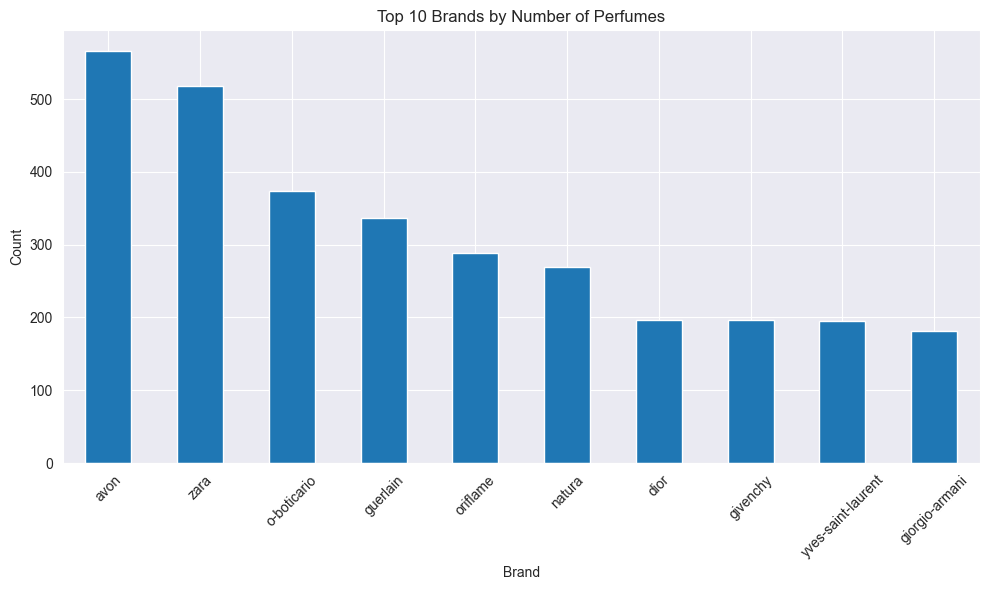

In [5]:
top_brands =df['Brand'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Number of Perfumes')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Overall, Avon and Zara have the most perfumes in this dataset. We also see desginer houses like guerlain, dior, ysl, and giorgio armani. Let's look at it for specific time intervals.

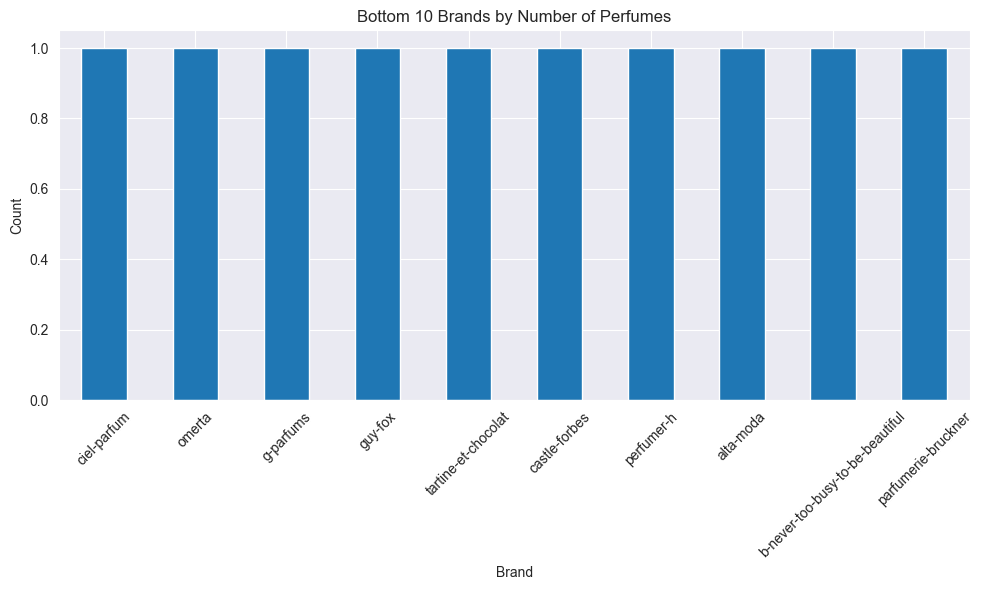

In [6]:
bottom_brands =df['Brand'].value_counts().sort_values(ascending=True).head(10)

plt.figure(figsize=(10,6))
bottom_brands.plot(kind='bar')
plt.title('Bottom 10 Brands by Number of Perfumes')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Most Popular Brands by Year

In [7]:
df['Year'].describe()

count    23846.000000
mean      2012.747463
std         12.961123
min       1781.000000
25%       2010.000000
50%       2015.000000
75%       2019.000000
max       2024.000000
Name: Year, dtype: float64

In [8]:
intervals =[-np.inf, 1990, 2000,2010,2015,2020,np.inf]
labels = ['<1990','1990-1999','2000-2009','2010-2014','2015-2019','2020+']

df['year_interval'] = pd.cut(df['Year'],bins=intervals,labels=labels)

N=5
brand_counts = (
    df.groupby(['year_interval', 'Brand'])
      .size()
      .reset_index(name='count')
      .sort_values(['year_interval', 'count'], ascending=[True, False])
      .groupby('year_interval')
      .head(N)
)

print(brand_counts)

     year_interval                        Brand  count
509          <1990                     guerlain     33
242          <1990                        caron     28
311          <1990                        creed     28
698          <1990  maitre-parfumeur-et-gantier     25
360          <1990                     dzintars     19
1856     1990-1999                  o-boticario     27
1367     1990-1999                         coty     23
1202     1990-1999                         avon     19
1460     1990-1999                       escada     18
1810     1990-1999                     molinard     18
2262     2000-2009                         avon    100
2629     2000-2009                     guerlain     81
2931     2000-2009                     oriflame     74
2615     2000-2009                     givenchy     64
2462     2000-2009                         dior     60
3322     2010-2014                         avon    204
3991     2010-2014                     oriflame    106
4066     2

/var/folders/jz/hkhgc4gx2dj_k8h_29_96nlw0000gn/T/ipykernel_61859/2239975364.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['year_interval', 'Brand'])
/var/folders/jz/hkhgc4gx2dj_k8h_29_96nlw0000gn/T/ipykernel_61859/2239975364.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('year_interval')


Up to the 1990s, Guerlain and Creed have released the most perfumes, for this dataset.

During the 1990s, o-boticario, coty and avon share the stage.

For the 2000s, avon and guerlain stay on top with givenchy and dior making an appearance.

For the early 2010s, avon is on top again, with oriflame and rasasi following behind.

For the late 2010s, zara, o-boticario, and avon (again) appear.

For the early-mid 2020s, zara, avon, and o-boticario make an appearance again, as well as some arabic perfume houses like lattafa and armaf.

### Brand Releases by Gender

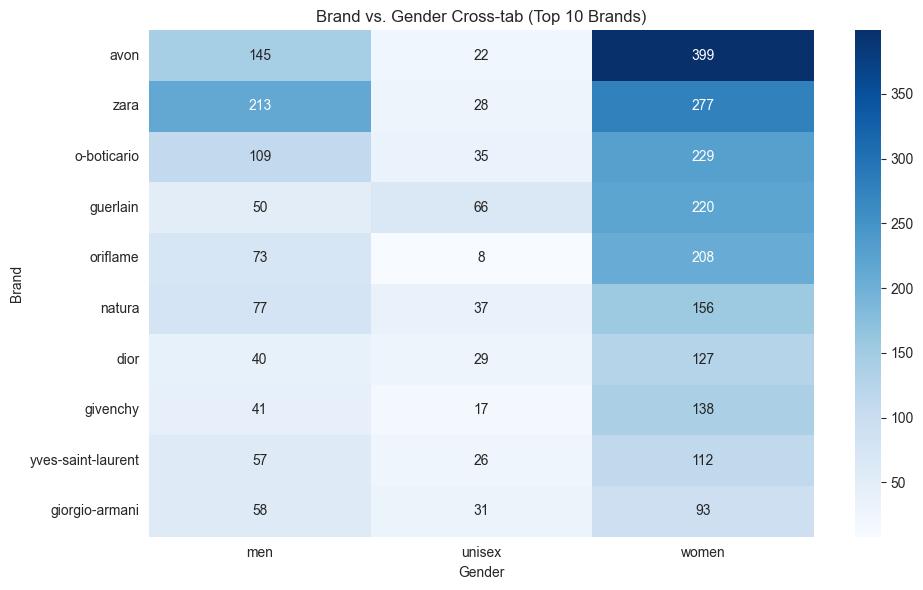

In [9]:
brand_gender_ct = pd.crosstab(df['Brand'],df['Gender'])
brand_gender_ct_top = brand_gender_ct.loc[top_brands.index]

plt.figure(figsize=(10,6))
sns.heatmap(brand_gender_ct_top,annot=True,fmt='d',cmap='Blues')
plt.title('Brand vs. Gender Cross-tab (Top 10 Brands)')
plt.xlabel('Gender')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

We can see that the top 10 brands have mostly perfumes for women with Zara being the only brand with almost as many colognes for men as perfumes for women.

## Country

### Top/Bottom K Perfume Releases by Countries

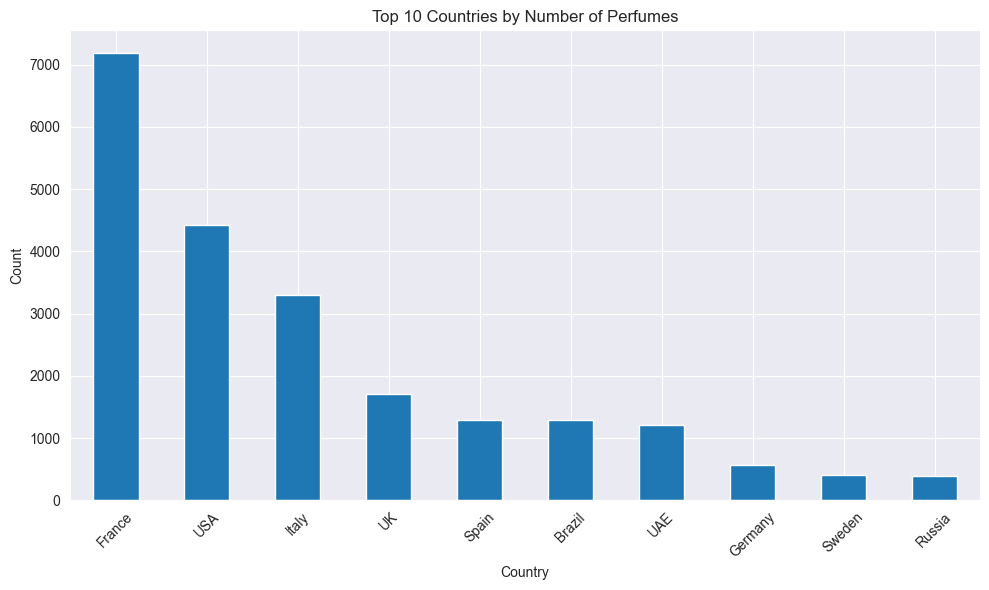

In [10]:
top_countries =df['Country'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Perfumes')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

France, USA, and Italy have the most perfumes in this dataset.

### Perfume Releases by Country per Yearly Intervals

In [11]:
country_counts = (
    df.groupby(['year_interval', 'Country'])
      .size()
      .reset_index(name='count')
      .sort_values(['year_interval', 'count'], ascending=[True, False])
      .groupby('year_interval')
      .head(N)
)

print(country_counts)

    year_interval  Country  count
14          <1990   France    479
52          <1990      USA    131
25          <1990    Italy     98
51          <1990       UK     44
45          <1990    Spain     35
68      1990-1999   France    386
106     1990-1999      USA    197
79      1990-1999    Italy    182
105     1990-1999       UK     56
99      1990-1999    Spain     51
122     2000-2009   France   1481
160     2000-2009      USA    887
133     2000-2009    Italy    584
159     2000-2009       UK    235
123     2000-2009  Germany    157
176     2010-2014   France   1964
214     2010-2014      USA   1218
187     2010-2014    Italy    873
213     2010-2014       UK    473
169     2010-2014   Brazil    238
230     2015-2019   France   1887
268     2015-2019      USA   1290
241     2015-2019    Italy   1023
267     2015-2019       UK    631
223     2015-2019   Brazil    608
284         2020+   France    994
322         2020+      USA    698
320         2020+      UAE    586
295         20

/var/folders/jz/hkhgc4gx2dj_k8h_29_96nlw0000gn/T/ipykernel_61859/3119887869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['year_interval', 'Country'])
/var/folders/jz/hkhgc4gx2dj_k8h_29_96nlw0000gn/T/ipykernel_61859/3119887869.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('year_interval')


France, USA, and Italy are in the top 3 for each interval except the last one where the UAE has made a push for third place.

### Most Correlated Accords per Country

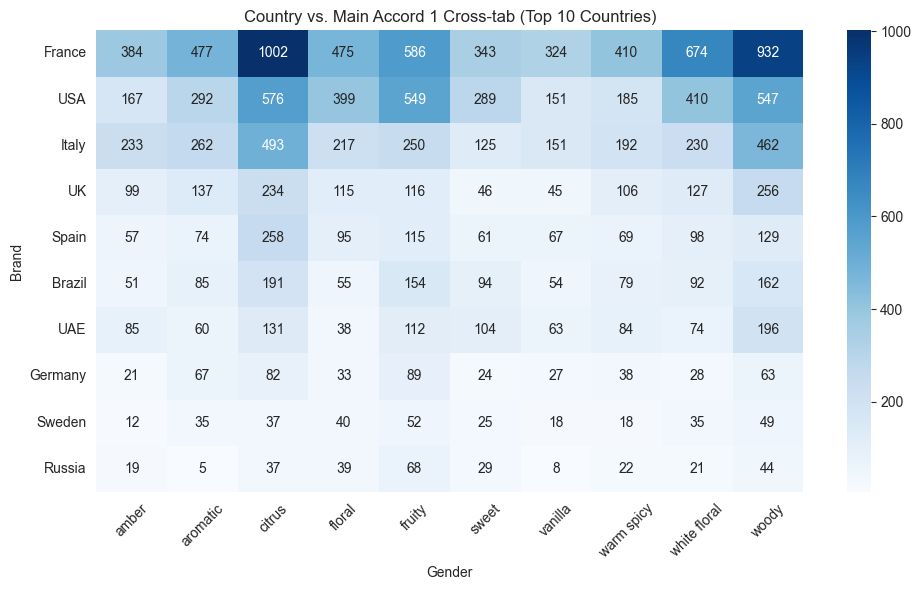

In [12]:
top_accords = df['mainaccord1'].value_counts().sort_values(ascending=False).head(10).index
df_top_accords = df[df['mainaccord1'].isin(top_accords)]

country_accord_ct = pd.crosstab(df_top_accords['Country'],df_top_accords['mainaccord1'])
country_accord_ct_top = country_accord_ct.loc[top_countries.index]

plt.figure(figsize=(10,6))
sns.heatmap(country_accord_ct_top,annot=True,fmt='d',cmap='Blues')
plt.title('Country vs. Main Accord 1 Cross-tab (Top 10 Countries)')
plt.xlabel('Gender')
plt.ylabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's show it as a proportion out of all releases per each country.

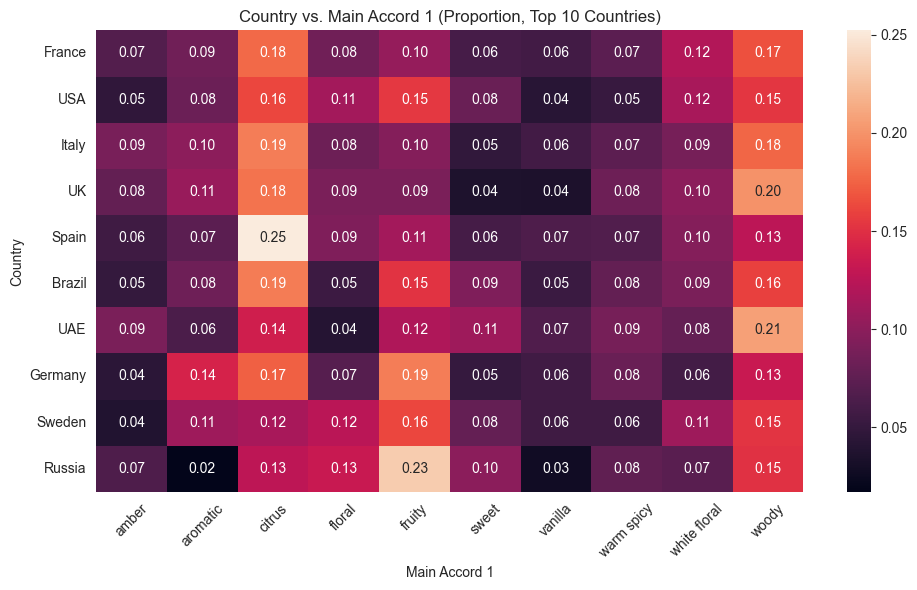

In [13]:
# Standardize the cross-tab by row (country)
country_accord_ct_prop = country_accord_ct_top.div(country_accord_ct_top.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(country_accord_ct_prop, annot=True, fmt='.2f')
plt.title('Country vs. Main Accord 1 (Proportion, Top 10 Countries)')
plt.xlabel('Main Accord 1')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that some countries have a tendency for more specific accords than others. For example, Spain has a tendency for the Citrusy accord, Russia for the Fruity accord, UAE and UK for the woody accord...

## Perfume Releases by Year

### Overall Release Trend

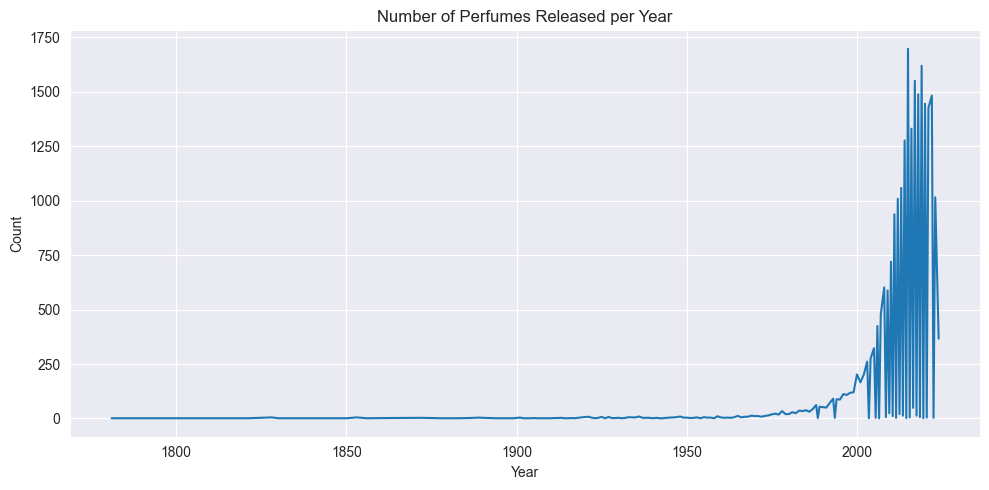

In [14]:
# Overall trend
yearly_counts = df.groupby('Year').size()

plt.figure(figsize=(10,5))
yearly_counts.plot()
plt.title('Number of Perfumes Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

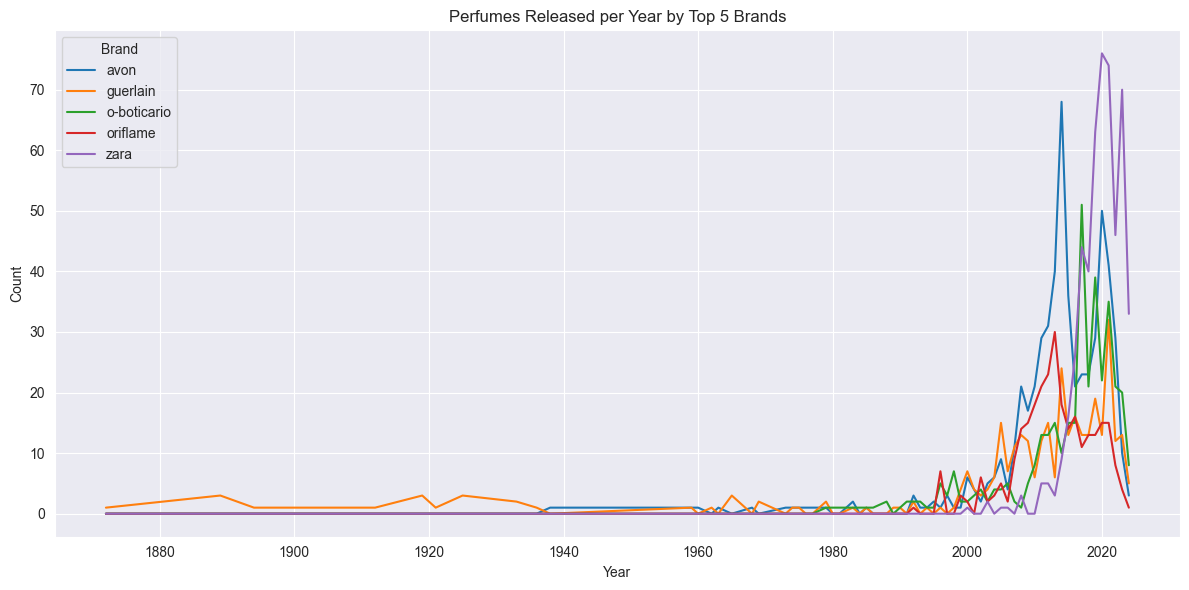

In [15]:
# Trend for top 5 brands
top_brands = df['Brand'].value_counts().head(5).index
df_top_brands = df[df['Brand'].isin(top_brands)]
brand_year_counts = df_top_brands.groupby(['Year', 'Brand']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
brand_year_counts.plot(ax=plt.gca())
plt.title('Perfumes Released per Year by Top 5 Brands')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Brand')
plt.tight_layout()
plt.show()

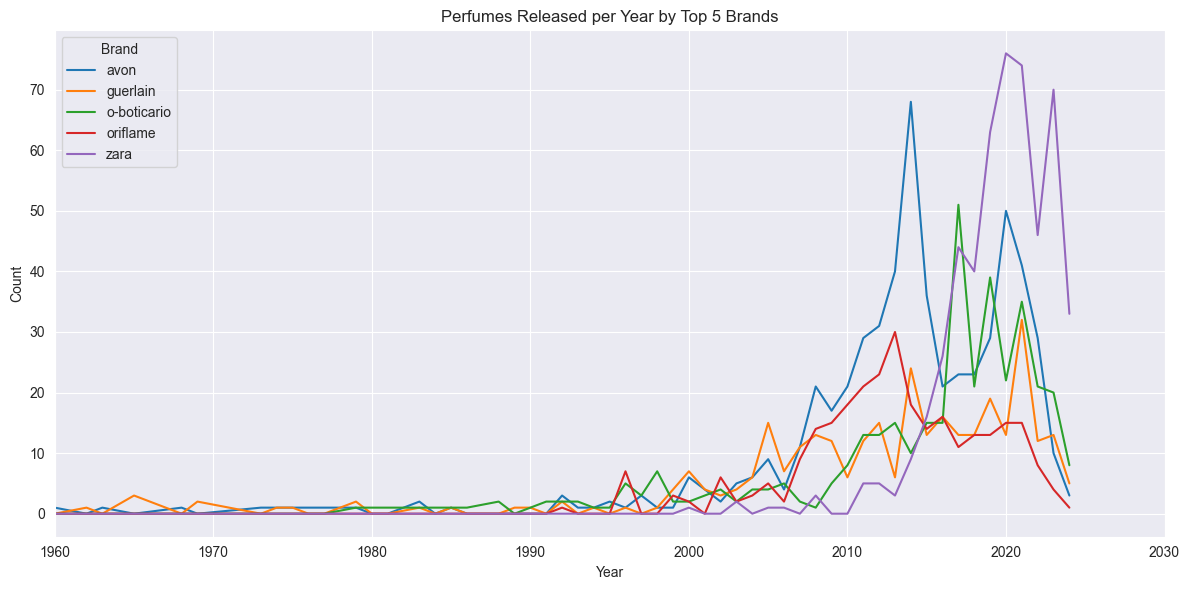

In [16]:
plt.figure(figsize=(12, 6))
brand_year_counts.plot(ax=plt.gca())
plt.xlim(1960,2030)
plt.title('Perfumes Released per Year by Top 5 Brands')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Brand')
plt.tight_layout()
plt.show()

We can see that Avon peaked in early 2010s while Zara had its peak in 2020.

## Perfume Rating

### Distributions

<Figure size 1000x600 with 0 Axes>

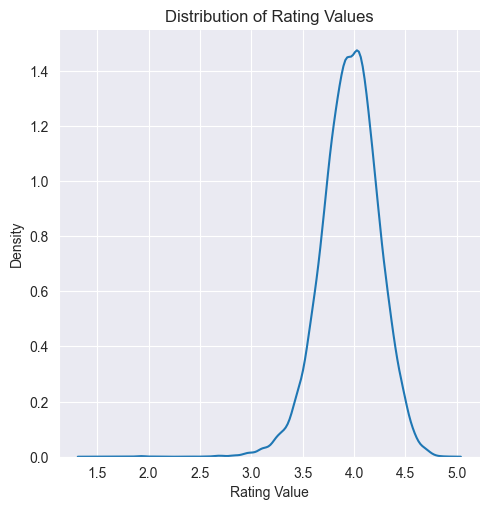

count    23846.000000
mean         3.960100
std          0.277622
min          1.420000
25%          3.790000
50%          3.970000
75%          4.150000
max          4.930000
Name: Rating Value, dtype: float64


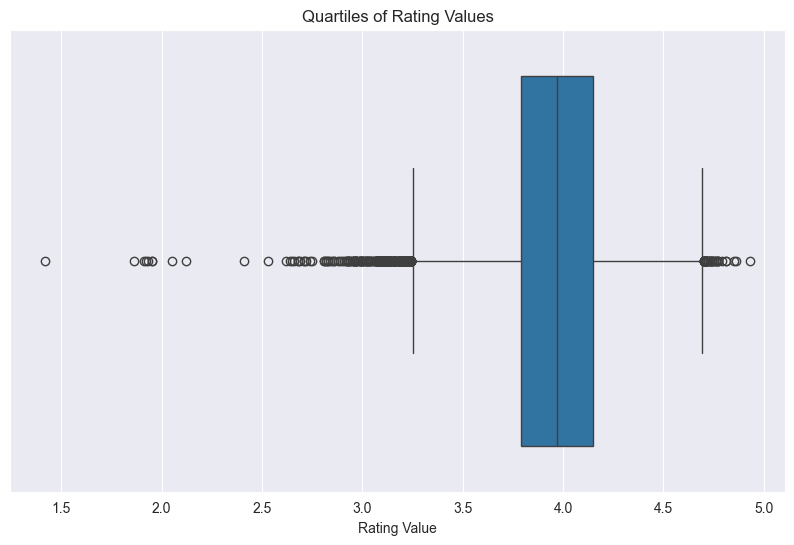

In [17]:
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Rating Value',kind="kde")
plt.title("Distribution of Rating Values")
plt.xlabel('Rating Value')
plt.show()

print(df['Rating Value'].describe())

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Rating Value')
plt.title("Quartiles of Rating Values")
plt.xlabel('Rating Value')
plt.show()

We can see that before weighing the rating value, its mean and median are around 4.00.

<Figure size 1000x600 with 0 Axes>

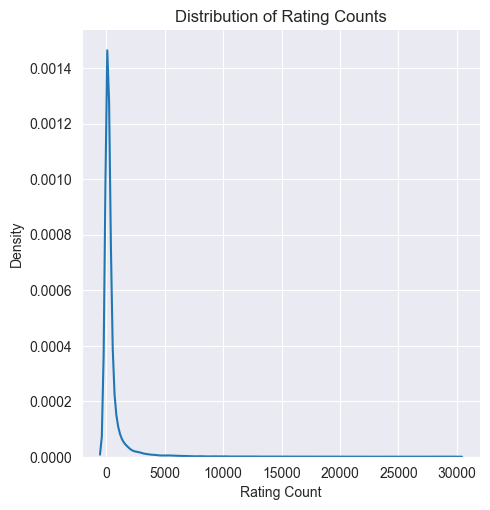

count    23846.000000
mean       498.820054
std       1422.017520
min         26.000000
25%         56.000000
50%        126.000000
75%        359.000000
max      29858.000000
Name: Rating Count, dtype: float64


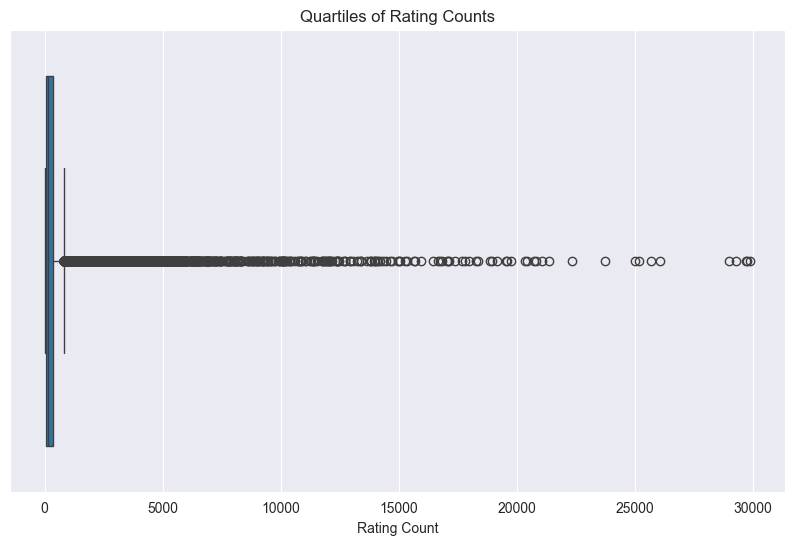

In [18]:
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Rating Count',kind="kde")
plt.title("Distribution of Rating Counts")
plt.xlabel('Rating Count')
plt.show()

print(df['Rating Count'].describe())

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Rating Count')
plt.title("Quartiles of Rating Counts")
plt.xlabel('Rating Count')
plt.show()


A very right skewed distribution indicating a small count of ratings for most perfumes, with 75% of its data having 359 ratings or less. Only 25%  of perfumes have higher counts with very high outliers of above 20K ratings. Hence, those with very little ratings are as represented as those with high amount of ratings. Introducing the Weighted Rating completed in the Data cleaning part of the project.

<Figure size 1000x600 with 0 Axes>

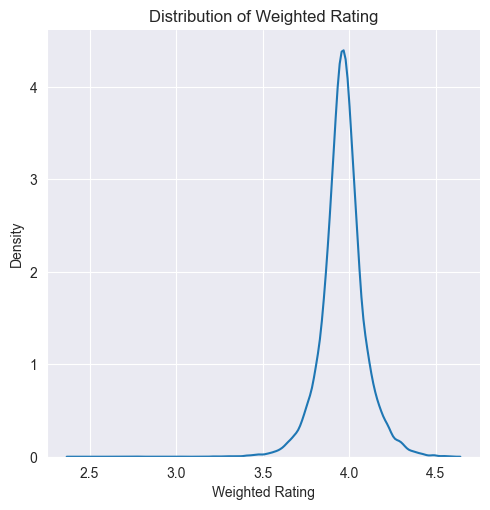

count    23846.000000
mean         3.963518
std          0.125882
min          2.418005
25%          3.900238
50%          3.963654
75%          4.026971
max          4.590594
Name: Weighted Rating, dtype: float64


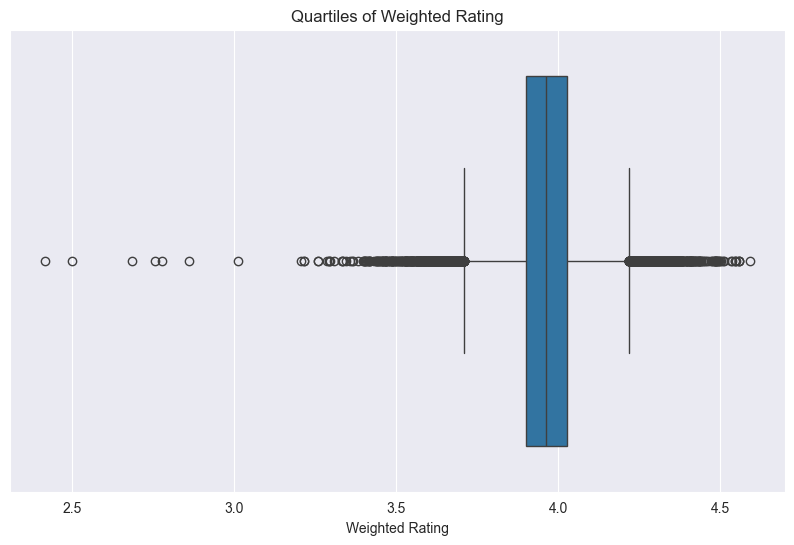

In [19]:
plt.figure(figsize=(10,6))
sns.displot(data=df,x='Weighted Rating',kind="kde")
plt.title("Distribution of Weighted Rating")
plt.xlabel('Weighted Rating')
plt.show()

print(df['Weighted Rating'].describe())

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Weighted Rating')
plt.title("Quartiles of Weighted Rating")
plt.xlabel('Weighted Rating')
plt.show()

For the weighted rating, the mean and median are approximately the same. Main change from the original Rating Value is that the min of the data is 2.41 where it used to be 1.42. In addition, the standard deviation reduced by more than a factor of 2, indicating less spread and more clustering around the mean.

This suggests that the weighting process reduced outliers and compressed the distribution, making it more robust and representative.

### Average Weighted Rating

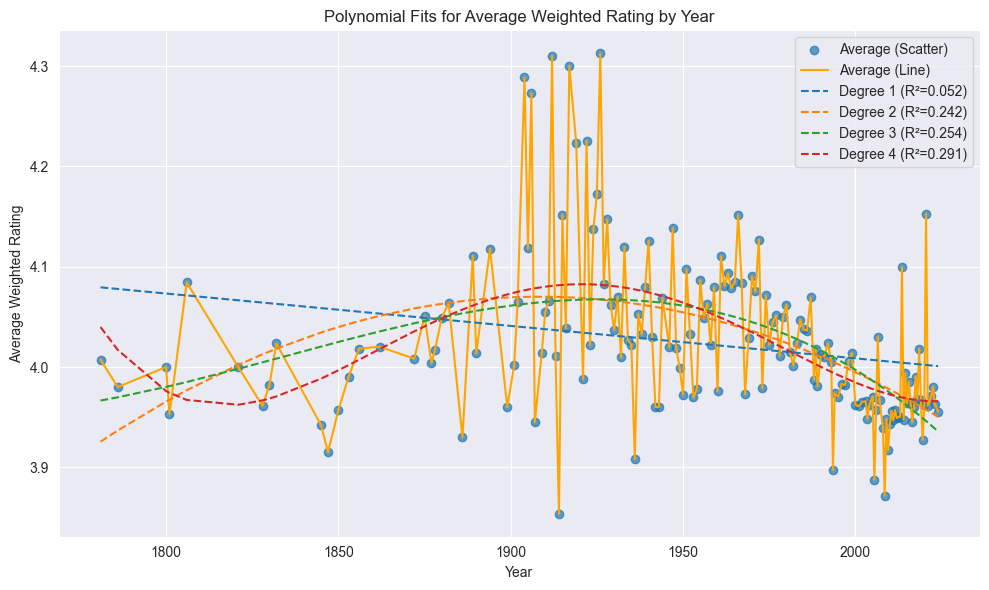

In [20]:
from sklearn.metrics._regression import r2_score
# Temporal Trends
average_ratings = df.groupby(['Year'])['Weighted Rating'].mean()

degrees = [1,2,3,4]
x = average_ratings.index.values
y = average_ratings.values
plt.figure(figsize=(10,6))
plt.scatter(x,y,label='Average (Scatter)',alpha=0.7)
plt.plot(x,y,color='orange',label='Average (Line)')

for deg in degrees:
    coeffs = np.polyfit(x, y, deg)
    poly = np.poly1d(coeffs)
    y_pred = poly(x)
    r2 = r2_score(y, y_pred)
    plt.plot(x, y_pred, label=f'Degree {deg} (R²={r2:.3f})', linestyle='--')

plt.title('Polynomial Fits for Average Weighted Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Weighted Rating')
plt.legend()
plt.tight_layout()
plt.show()

Even with a degree 4 polynomial line of best fit, the R squared value is as low as 0.291 which means that about 29.1% of the average weighted rating by year is explained by the model. This indicates a weak fit.

### Rating Correlation with Rating Count

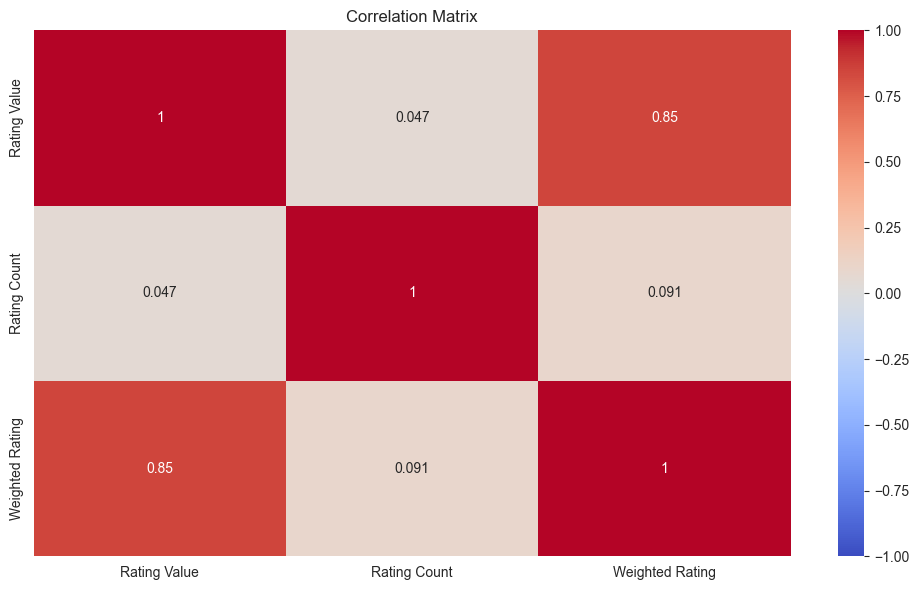

In [21]:
# correlation analysis
corr_cols = ['Rating Value','Rating Count','Weighted Rating']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

As expected the correlation between the Rating Value, Weighted Rating, and Rating Count are irrelevant and very weak.

### Top/ Bottom K perfume ratings

In [22]:
bottom_colognes = (
    df[df['Gender'] == 'men']
    .nsmallest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(bottom_colognes)

                       Perfume               Brand  Weighted Rating
12659  le-male-pride-collector  jean-paul-gaultier         2.418005
12657       le-male-pride-2023  jean-paul-gaultier         2.499959
12658       le-male-pride-2024  jean-paul-gaultier         2.778907
12660    le-male-pride-edition  jean-paul-gaultier         2.861810
6432              donald-trump               trump         3.012926


In [23]:
bottom_perfumes = (
    df[df['Gender'] == 'women']
    .nsmallest(5, 'Weighted Rating')
    [['Perfume', 'Brand','Weighted Rating']]
)
print(bottom_perfumes)

                     Perfume           Brand  Weighted Rating
9100           giordani-gold        oriflame         3.217201
21841  tutti-twilly-d-hermes          hermes         3.258245
22278           vanilla-milk  ellis-brooklyn         3.291879
20527           summer-white            avon         3.309767
11619            kenzo-world           kenzo         3.332131


In [24]:
bottom_unisex_perfumes = (
    df[df['Gender'] == 'unisex']
    .nsmallest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(bottom_unisex_perfumes)

                              Perfume               Brand  Weighted Rating
523    accento-overdose-pride-edition             xerjoff         2.686883
4865             classique-pride-2023  jean-paul-gaultier         2.755402
22286                     vanilla-sex            tom-ford         3.207769
5010                          cocaine       franck-boclet         3.260007
15430                   new-look-2024                dior         3.296168


In [25]:
bottom_k = (
    df.nsmallest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(bottom_k)

                              Perfume               Brand  Weighted Rating
12659         le-male-pride-collector  jean-paul-gaultier         2.418005
12657              le-male-pride-2023  jean-paul-gaultier         2.499959
523    accento-overdose-pride-edition             xerjoff         2.686883
4865             classique-pride-2023  jean-paul-gaultier         2.755402
12658              le-male-pride-2024  jean-paul-gaultier         2.778907


We can see that overall, Pride edition colognes/perfumes are the lowest rankers.

In [26]:
top_colognes = (
    df[df['Gender'] == 'men']
    .nlargest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(top_colognes)

                                          Perfume               Brand  \
12650                           le-male-le-parfum  jean-paul-gaultier   
21185                      the-most-wanted-parfum              azzaro   
22214                 valentino-uomo-intense-2021           valentino   
7228   emporio-armani-stronger-with-you-intensely      giorgio-armani   
12646                              le-male-elixir  jean-paul-gaultier   

       Weighted Rating  
12650         4.590594  
21185         4.558832  
22214         4.558190  
7228          4.557537  
12646         4.548668  


In [27]:
top_perfumes = (
    df[df['Gender'] == 'women']
    .nlargest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(top_perfumes)

                       Perfume               Brand  Weighted Rating
19578          shalimar-parfum            guerlain         4.475645
16108             opium-parfum  yves-saint-laurent         4.455465
17327  poison-esprit-de-parfum                dior         4.447284
15151                  mystere              rochas         4.413036
12059    l-heure-bleue-extract            guerlain         4.411384


In [28]:
top_unisex_perfumes = (
    df[df['Gender'] == 'unisex']
    .nlargest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(top_unisex_perfumes)

             Perfume             Brand  Weighted Rating
23499  xj-1861-naxos           xerjoff         4.499185
21541       torino21           xerjoff         4.485615
12589         layton  parfums-de-marly         4.451422
19611   sharaf-blend            zimaya         4.436184
19867    single-malt         by-kilian         4.432525


In [29]:
top_k = (
    df.nlargest(5, 'Weighted Rating')
    [['Perfume','Brand', 'Weighted Rating']]
)
print(top_k)

                                          Perfume               Brand  \
12650                           le-male-le-parfum  jean-paul-gaultier   
21185                      the-most-wanted-parfum              azzaro   
22214                 valentino-uomo-intense-2021           valentino   
7228   emporio-armani-stronger-with-you-intensely      giorgio-armani   
12646                              le-male-elixir  jean-paul-gaultier   

       Weighted Rating  
12650         4.590594  
21185         4.558832  
22214         4.558190  
7228          4.557537  
12646         4.548668  


We can see that the top 5 colognes for men are the top 5 for the whole dataset.

## Notes

### Frequency analysis

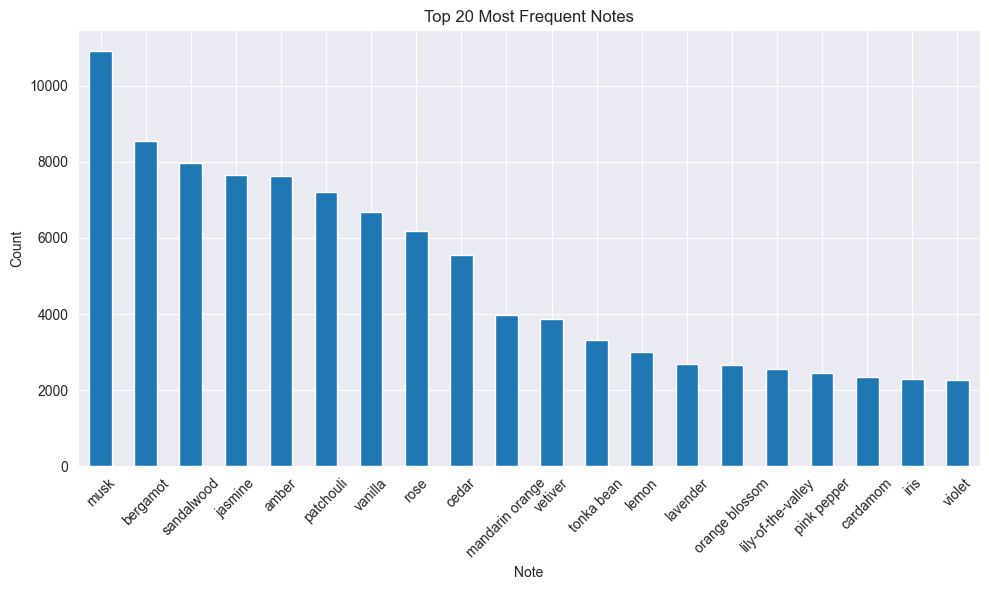

In [30]:
note_counts_head = bridge['note'].value_counts().head(20)

plt.figure(figsize=(10,6))
note_counts_head.plot(kind='bar')
plt.title('Top 20 Most Frequent Notes')
plt.xlabel('Note')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

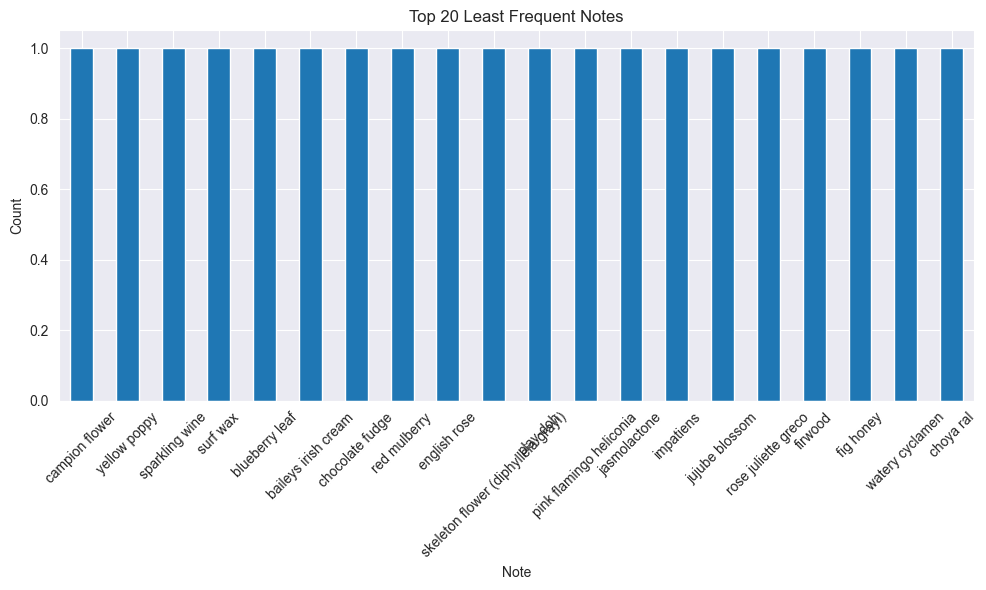

In [31]:
note_counts_tail = bridge['note'].value_counts().tail(20)

plt.figure(figsize=(10,6))
note_counts_tail.plot(kind='bar')
plt.title('Top 20 Least Frequent Notes')
plt.xlabel('Note')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Frequency analysis per Level

In [32]:
level_note_counts = bridge.groupby('level')['note'].value_counts().groupby('level').head(10)

print(level_note_counts)

level  note              
base   musk                  10542
       sandalwood             7250
       amber                  7079
       vanilla                6116
       patchouli              5910
       cedar                  4408
       vetiver                3317
       tonka bean             2961
       oakmoss                1803
       white musk             1682
mid    jasmine                7038
       rose                   5320
       lily-of-the-valley     2283
       orange blossom         1959
       violet                 1758
       iris                   1746
       ylang-ylang            1721
       geranium               1663
       lavender               1496
       peony                  1330
top    bergamot               8453
       mandarin orange        3896
       lemon                  2934
       grapefruit             2162
       pink pepper            1999
       cardamom               1508
       orange                 1487
       pear                  

We can see that for base notes we see more woody notes. For middle notes we see more flowery notes. For top notes we see more citrusy notes.

### Segmentation by Gender

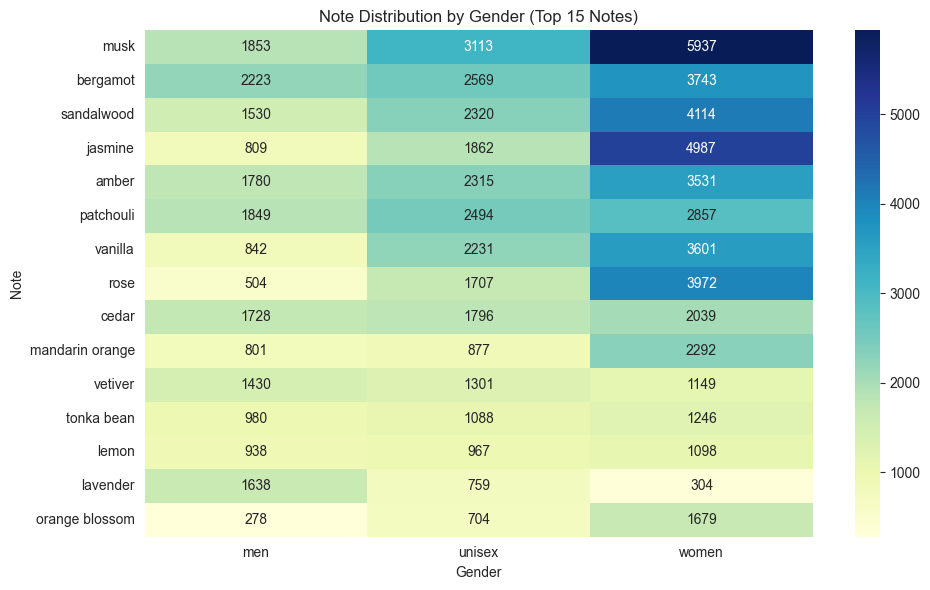

In [33]:
def make_id(r):
    b, p = str(r['Brand']).strip(), str(r['Perfume']).strip()
    y = r['Year']
    return f"{b}|{p}|{int(y)}"

df['fragrance_id'] = df.apply(make_id, axis=1)

bridge_gender = bridge.merge(df[['fragrance_id','Gender']],on='fragrance_id')
note_gender_ct = pd.crosstab(bridge_gender['note'],bridge_gender['Gender'])

top_notes = note_gender_ct.sum(axis=1).sort_values(ascending=False).head(15).index
note_gender_ct_top = note_gender_ct.loc[top_notes]

plt.figure(figsize=(10,6))
sns.heatmap(note_gender_ct_top,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Note Distribution by Gender (Top 15 Notes)')
plt.ylabel('Note')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

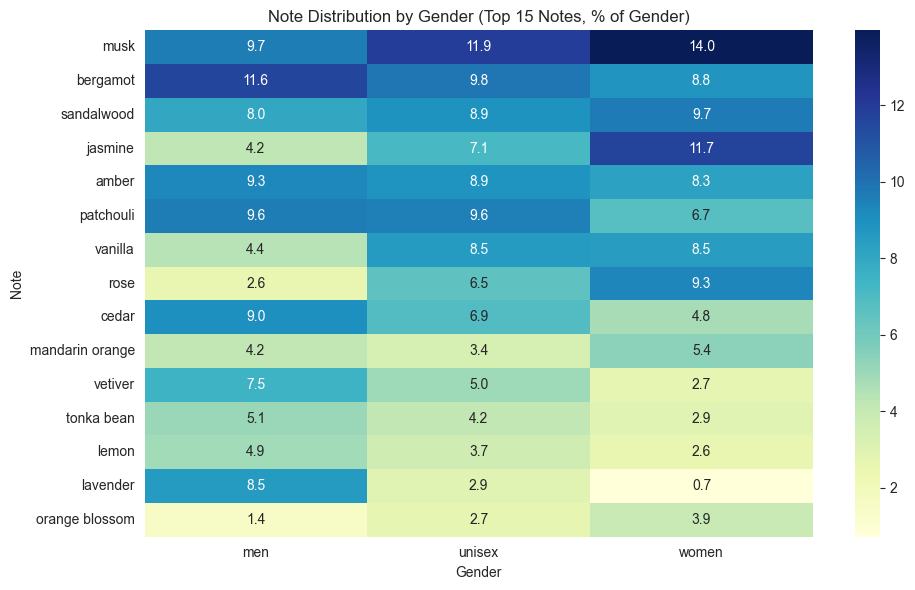

In [34]:
# Normalize by gender (column-wise)
note_gender_ct_prop = note_gender_ct_top.div(note_gender_ct_top.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10,6))
sns.heatmap(note_gender_ct_prop, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Note Distribution by Gender (Top 15 Notes, % of Gender)')
plt.ylabel('Note')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

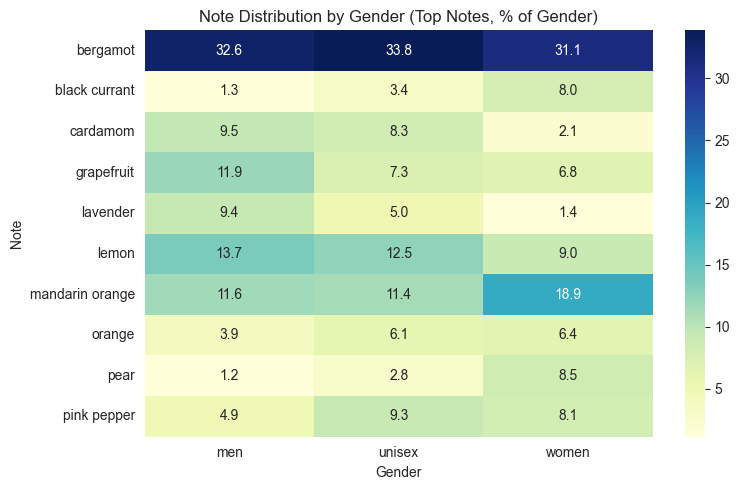

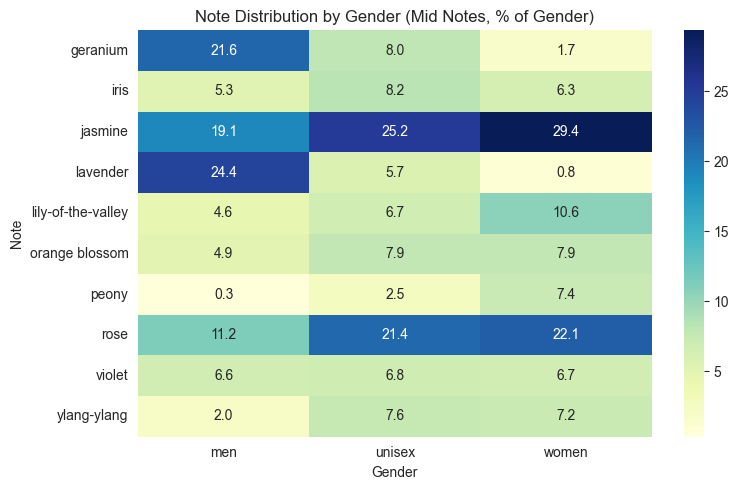

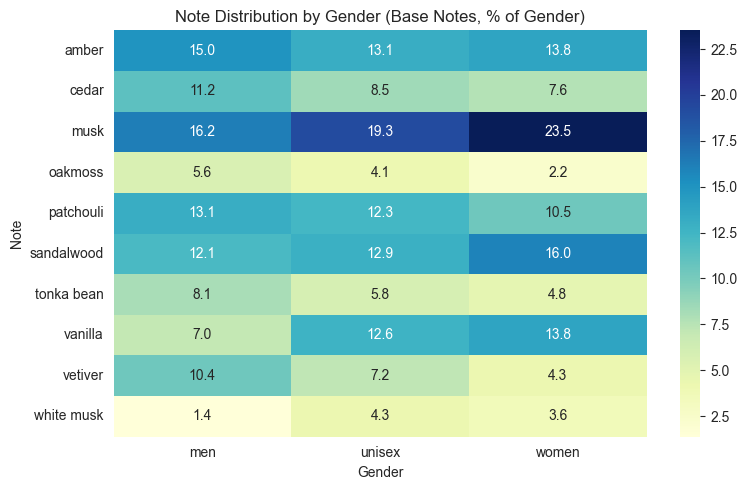

In [35]:
levels = bridge_gender['level'].unique()
for lvl in levels:
    data_lvl = bridge_gender[bridge_gender['level'] == lvl]
    top_notes = data_lvl['note'].value_counts().head(10).index
    ct = pd.crosstab(data_lvl[data_lvl['note'].isin(top_notes)]['note'], data_lvl[data_lvl['note'].isin(top_notes)]['Gender'])
    ct_prop = ct.div(ct.sum(axis=0), axis=1) * 100

    plt.figure(figsize=(8, 5))
    sns.heatmap(ct_prop, annot=True, fmt='.1f', cmap='YlGnBu')
    plt.title(f'Note Distribution by Gender ({lvl.title()} Notes, % of Gender)')
    plt.ylabel('Note')
    plt.xlabel('Gender')
    plt.tight_layout()
    plt.show()

For the top notes, we see that bergamot is the most popular and is being used in about 30% of fragrances for each gender category.

For middle notes, Geranium appears in 21% of men's colognes. Lavendar is also very popular with men's colognes, while jasmine is popular with the women and unisex perfumes more than men's colognes. Same thing with rose.

For base notes, we can see that Musk is most popular with womens perfumes, followed by unisex and men's colognes. Amber appears slightly more in men's colognes than the other categories. While Vanilla appears more in womens perfumes. Same with sandalwwood.

### Note Co-occurance Matrix

In [36]:
df['Top'] = df['Top'].apply(ast.literal_eval)
df['Middle'] = df['Middle'].apply(ast.literal_eval)
df['Base'] = df['Base'].apply(ast.literal_eval)

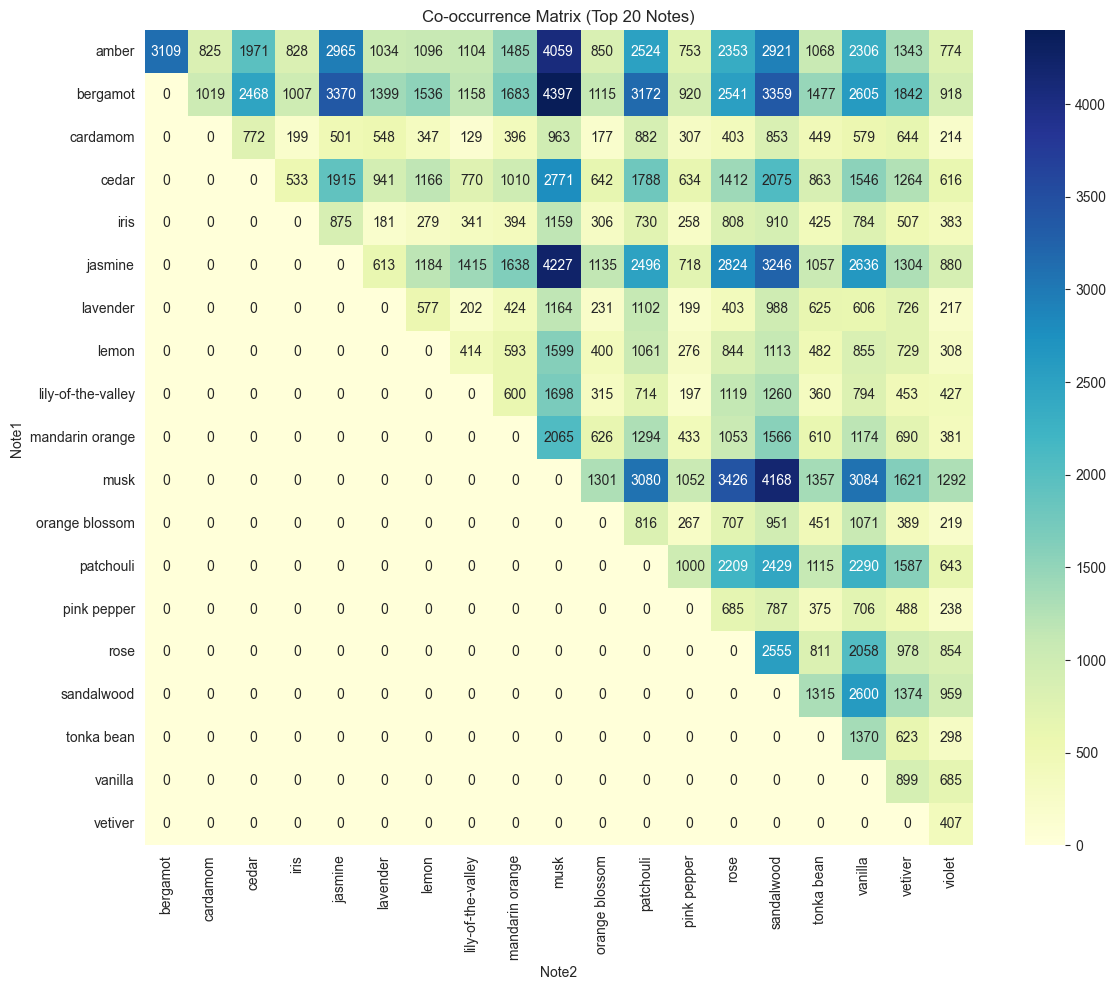

In [37]:
from itertools import combinations
from collections import Counter

df['all_notes'] = df[['Top','Middle','Base']].apply(lambda row: sum(row, []), axis=1)

# Count co-occurrences
co_occurrence = Counter()
for notes in df['all_notes']:
    unique_notes = set(notes)
    for a, b in combinations(sorted(unique_notes), 2):
        co_occurrence[(a, b)] += 1

# Get top 20 notes overall
all_notes_flat = [note for notes in df['all_notes'] for note in notes]
top_notes = pd.Series(all_notes_flat).value_counts().head(20).index

# Build co-occurrence DataFrame for top notes
co_df = pd.DataFrame(
    [(a, b, count) for (a, b), count in co_occurrence.items() if a in top_notes and b in top_notes],
    columns=['Note1', 'Note2', 'Count']
)
co_matrix = co_df.pivot(index='Note1', columns='Note2', values='Count').fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(co_matrix, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Co-occurrence Matrix (Top 20 Notes)')
plt.tight_layout()
plt.show()

We can see that musk is paired a lot with amber, sandelwood, jasmine and bergamot. Same thing with Vanilla. Patchouli is paired a lot with musk, jasmine, bergamot and amber.

### Temporal Trends in Top Notes

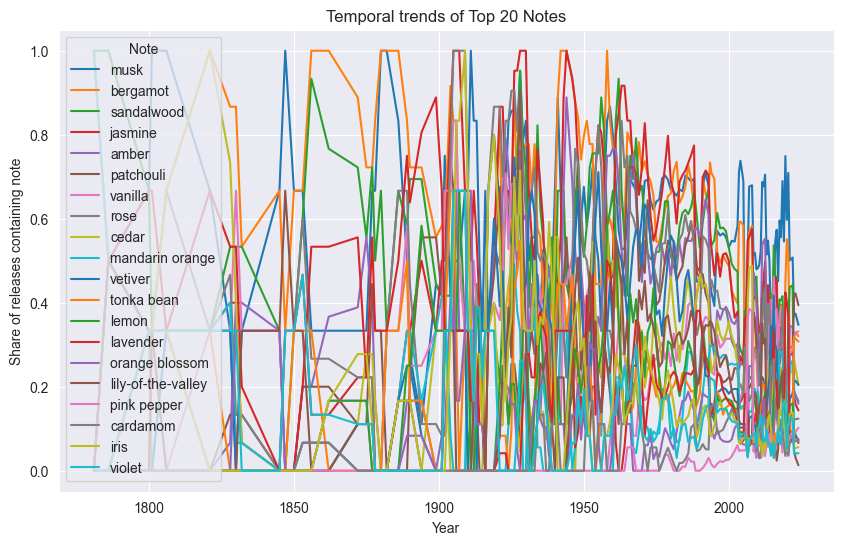

In [38]:
trend = {}
for note in top_notes:
    has_note = df.apply(lambda r: note.lower() in r['all_notes'],axis=1)
    per_year = df[has_note].groupby('Year').size()
    trend[note] = (per_year/yearly_counts).fillna(0)

trend_df = pd.DataFrame(trend).sort_index()

trend_df.rolling(3,min_periods=1).mean().plot(figsize=(10,6))
plt.title("Temporal trends of Top 20 Notes")
plt.ylabel('Share of releases containing note')
plt.xlabel('Year')
plt.legend(title='Note')
plt.show()

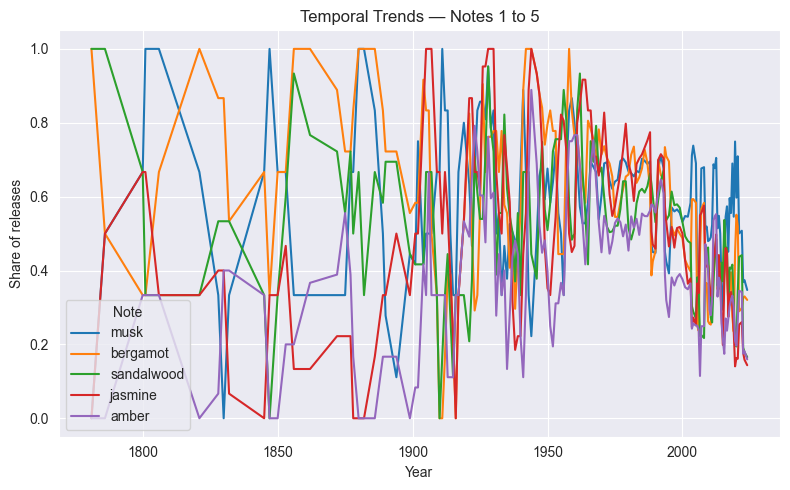

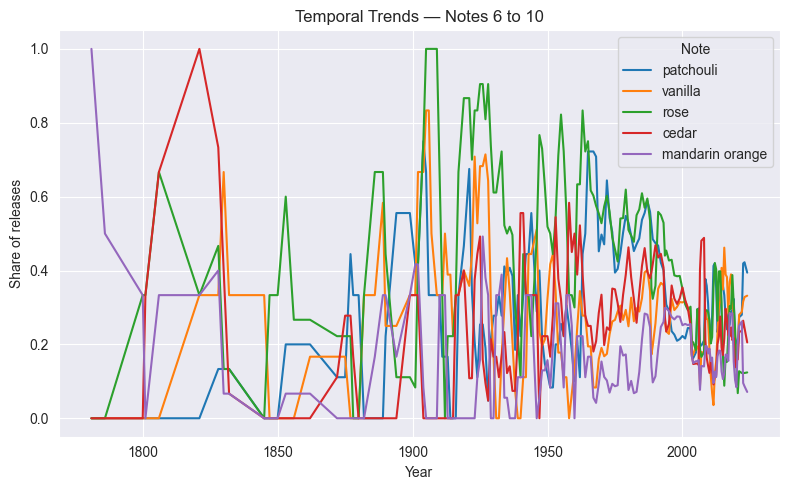

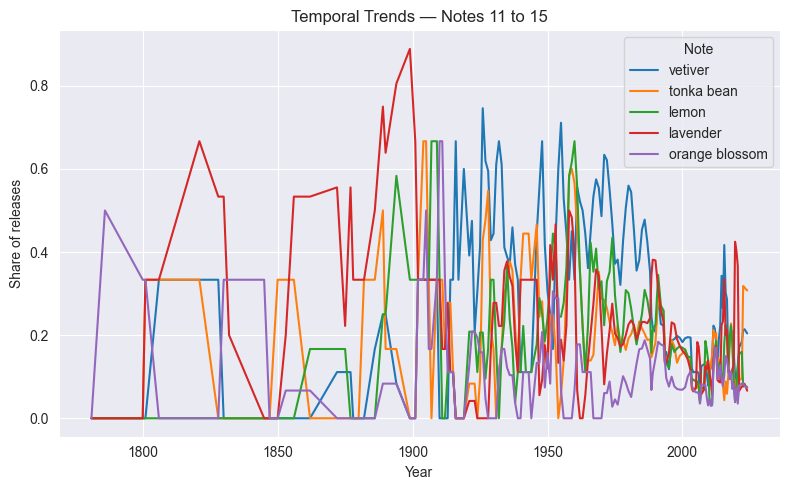

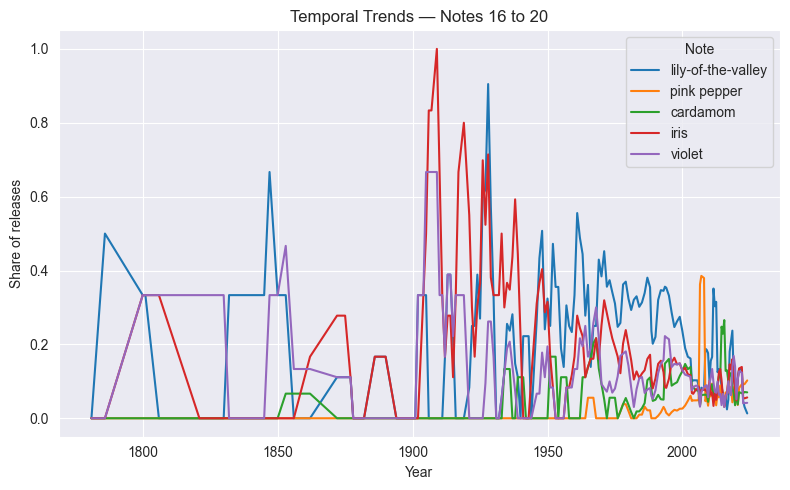

In [39]:
chunks = [top_notes[i:i+5] for i in range(0, len(top_notes), 5)]
trend_df = trend_df.rolling(3,min_periods=1).mean()

for i, chunk in enumerate(chunks, 1):
    ax = trend_df[chunk].plot(figsize=(8,5))
    ax.set_title(f"Temporal Trends — Notes {((i-1)*5+1)} to {i*5}")
    ax.set_ylabel("Share of releases")
    ax.set_xlabel("Year")
    plt.legend(title="Note")
    plt.tight_layout()
    plt.show()

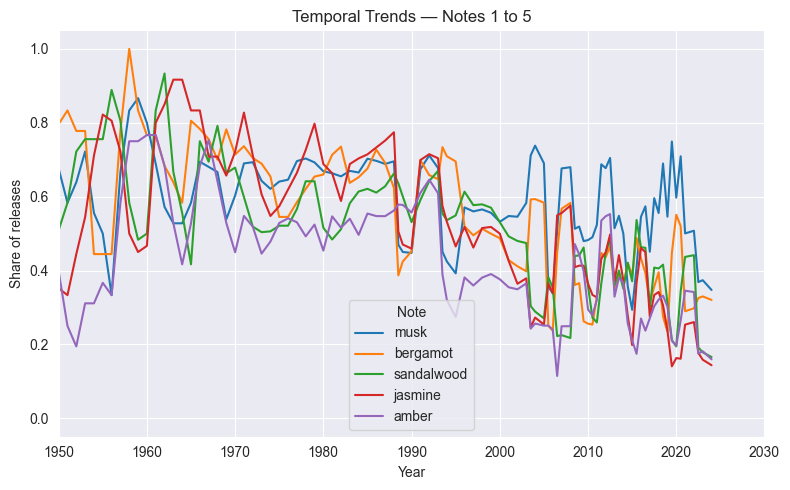

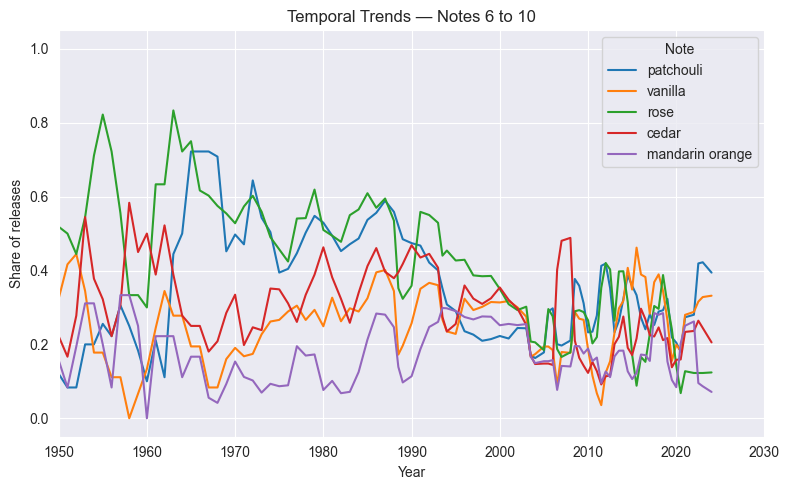

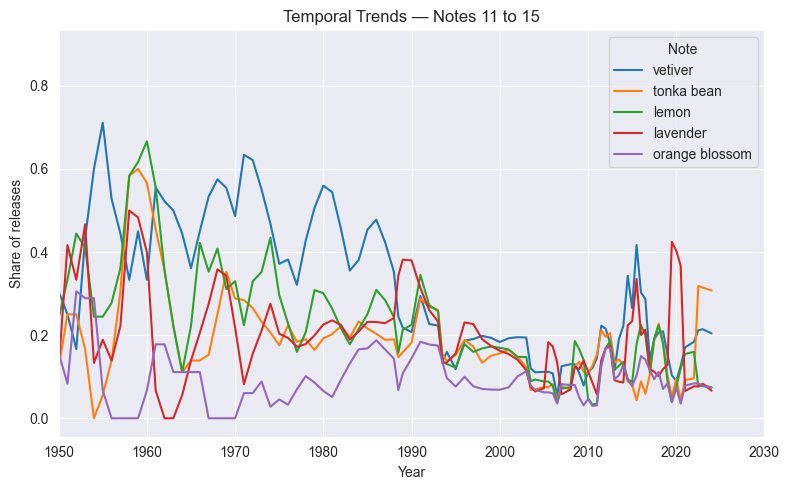

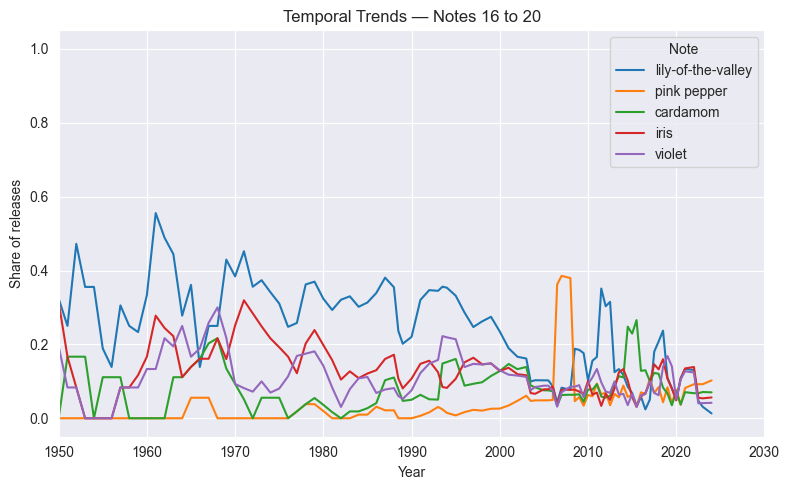

In [40]:
for i, chunk in enumerate(chunks, 1):
    ax = trend_df[chunk].plot(figsize=(8,5))
    ax.set_title(f"Temporal Trends — Notes {((i-1)*5+1)} to {i*5}")
    ax.set_ylabel("Share of releases")
    ax.set_xlabel("Year")
    ax.set_xlim(1950,2030)
    plt.legend(title="Note")
    plt.tight_layout()
    plt.show()

We seem to have a denominator growth problem where the number of perfumes released per year keeps growing and so the share of releases diminishes. Let's try using the absolute count instead of shares.

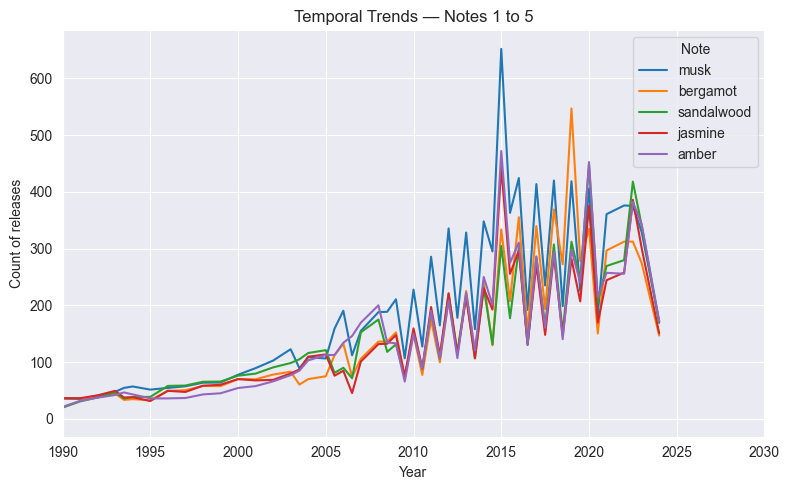

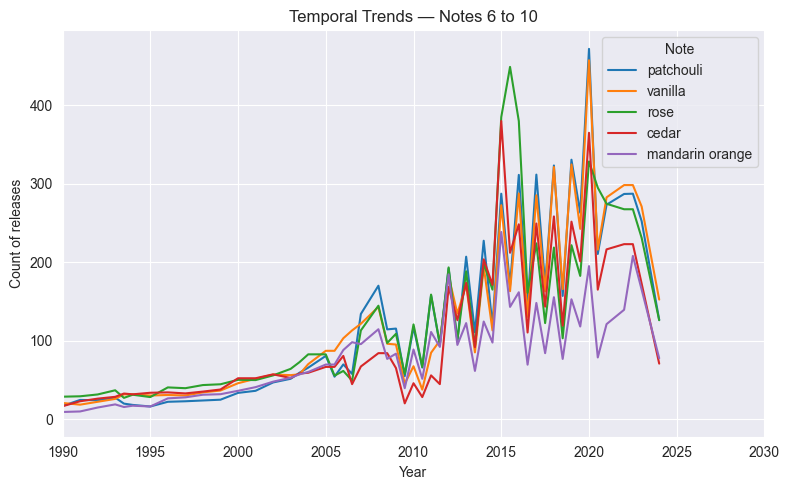

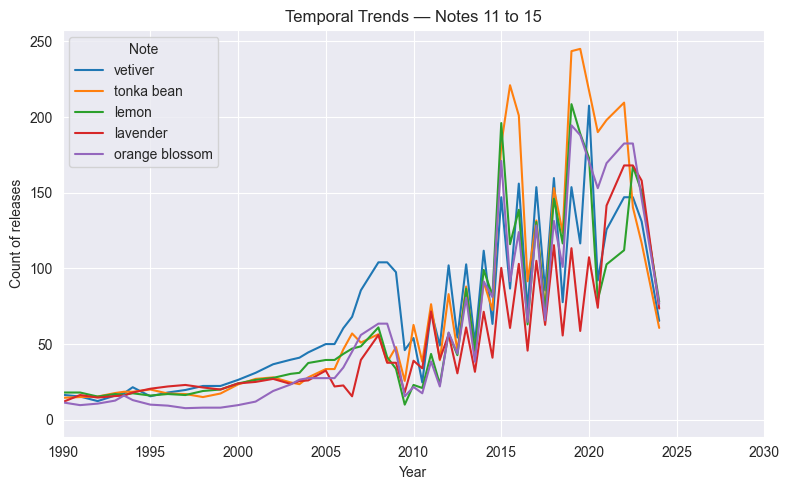

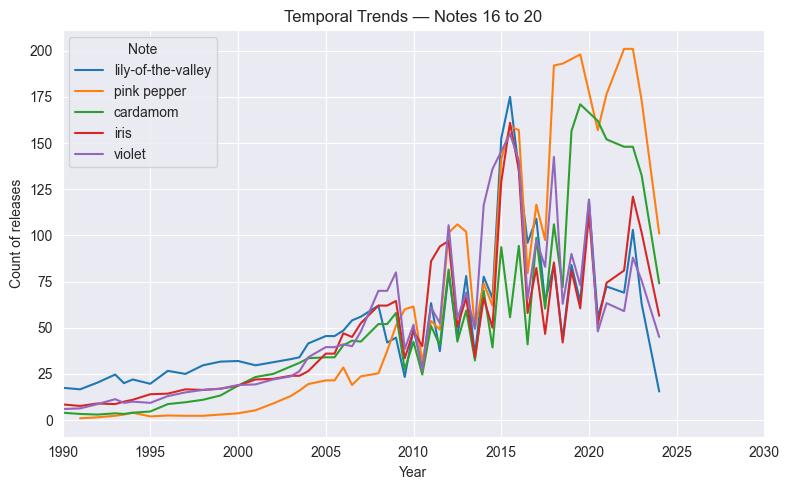

In [41]:
abs_trend = {}
for note in top_notes:
    has_note = df.apply(lambda r: note.lower() in r['all_notes'], axis=1)
    abs_trend[note]  = df[has_note].groupby('Year').size()

abs_trend_df = pd.DataFrame(abs_trend).sort_index()
abs_trend_df = abs_trend_df.rolling(3,min_periods=1).mean()

for i, chunk in enumerate(chunks, 1):
    ax = abs_trend_df[chunk].plot(figsize=(8,5))
    ax.set_title(f"Temporal Trends — Notes {((i-1)*5+1)} to {i*5}")
    ax.set_ylabel("Count of releases")
    ax.set_xlabel("Year")
    ax.set_xlim(1990,2030)
    plt.legend(title="Note")
    plt.tight_layout()
    plt.show()

Now let's try using a measure such as Z-score to get a better prominence for each note over time.

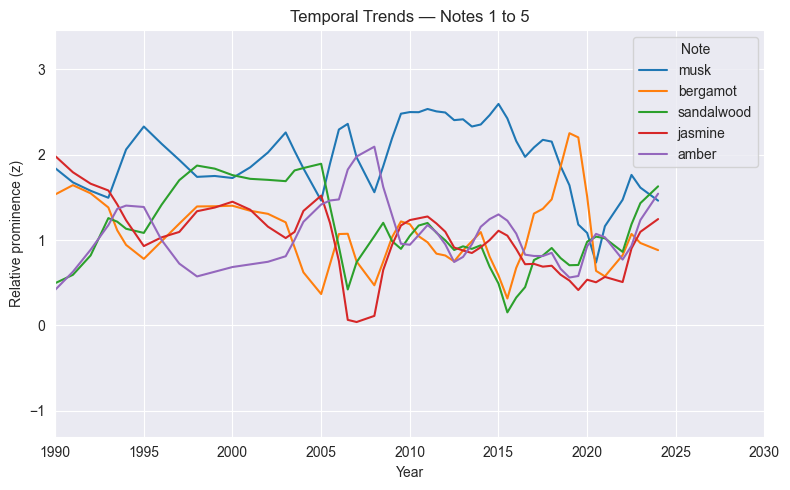

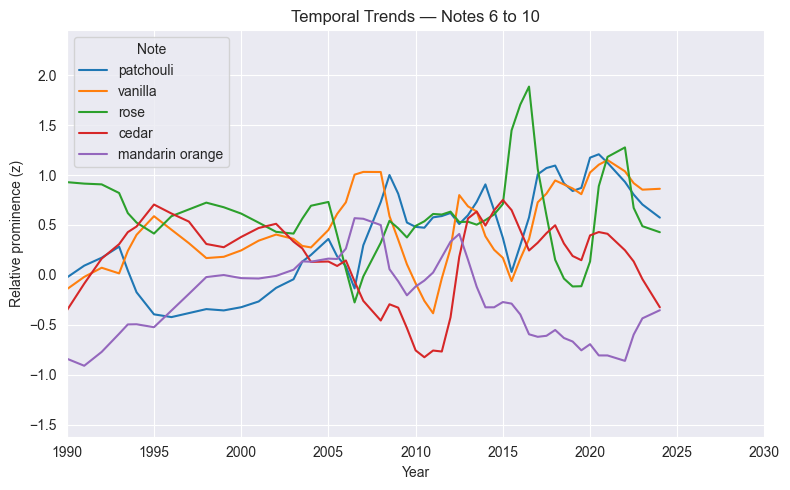

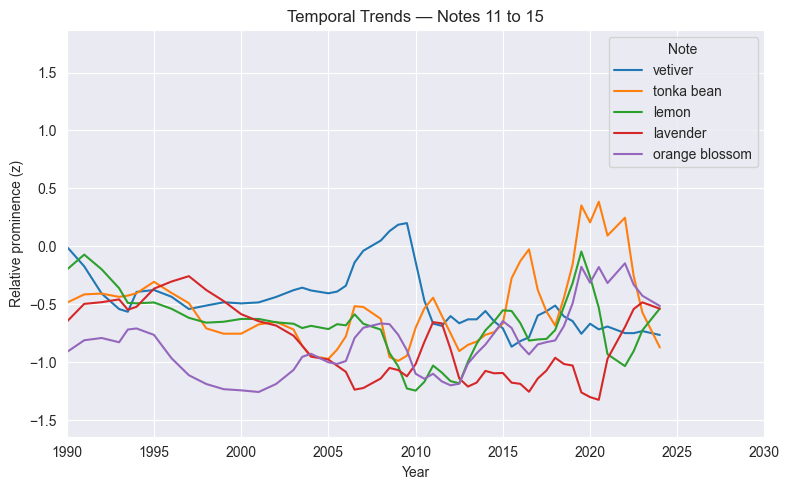

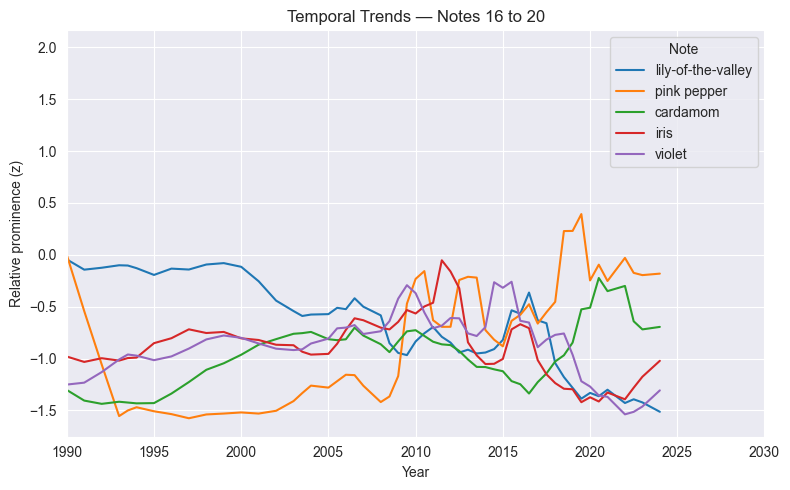

In [42]:
years = abs_trend_df.index
row_means = abs_trend_df.mean(axis=1)
row_stds = abs_trend_df.std(axis=1).replace(0,np.nan)
z_trend_df = (abs_trend_df.sub(row_means,axis=0).div(row_stds,axis=0)).fillna(0.0)

z_trend_df = z_trend_df.rolling(3,min_periods=1).mean()

for i, chunk in enumerate(chunks, 1):
    ax = z_trend_df[chunk].plot(figsize=(8,5))
    ax.set_title(f"Temporal Trends — Notes {((i-1)*5+1)} to {i*5}")
    ax.set_ylabel("Relative prominence (z)")
    ax.set_xlabel("Year")
    ax.set_xlim(1990,2030)
    plt.legend(title="Note")
    plt.tight_layout()
    plt.show()


We can use the absolute counts to show real growth/decline in how often a note appears.

Per-Year Z-score compares notes within the same year, so it is immune to the explosion in total releases, which fixes the issue we had earlier. So now a line drifting down means the note is losing relative mindshare, not just being diluted by more total perfumes.

Looking at both graphs, we can see that for the absolute counts that musk has a higher count up until 2015 when it has a big explosion in counts and then subsides but still stays higher than others, except for 2018 where bergamot exceeds it. We can see the same happen when we look at the Z-score prominence charts.

For the rose note, we can see something interesting happen around 2017-2018 where it has a higher positive prominence in 2017 but the next few years its prominence becomes slightly negative, and then it rises again. There seems to be a periodic cycle with length of about 5 years in where the prominence of the rose note inclines and declines. This pattern is rather recent as it began around 2010-2012.

## Accords

### Basic Distribution

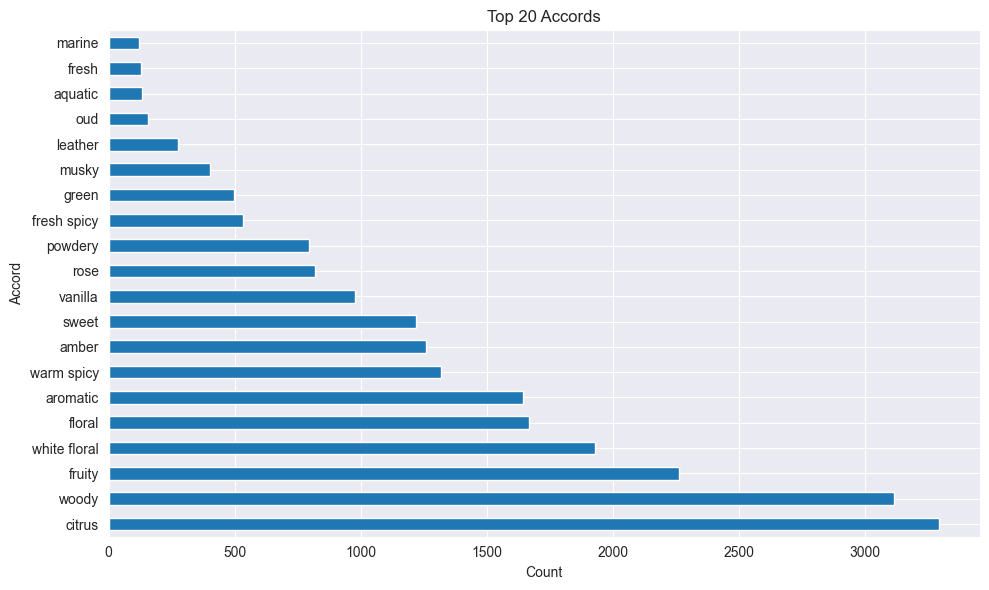

In [43]:
top_accords = df['mainaccord1'].value_counts().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
top_accords.plot(kind='barh')
plt.title('Top 20 Accords')
plt.xlabel('Count')
plt.ylabel('Accord')
plt.tight_layout()
plt.show()

### Accord Co-Occurance

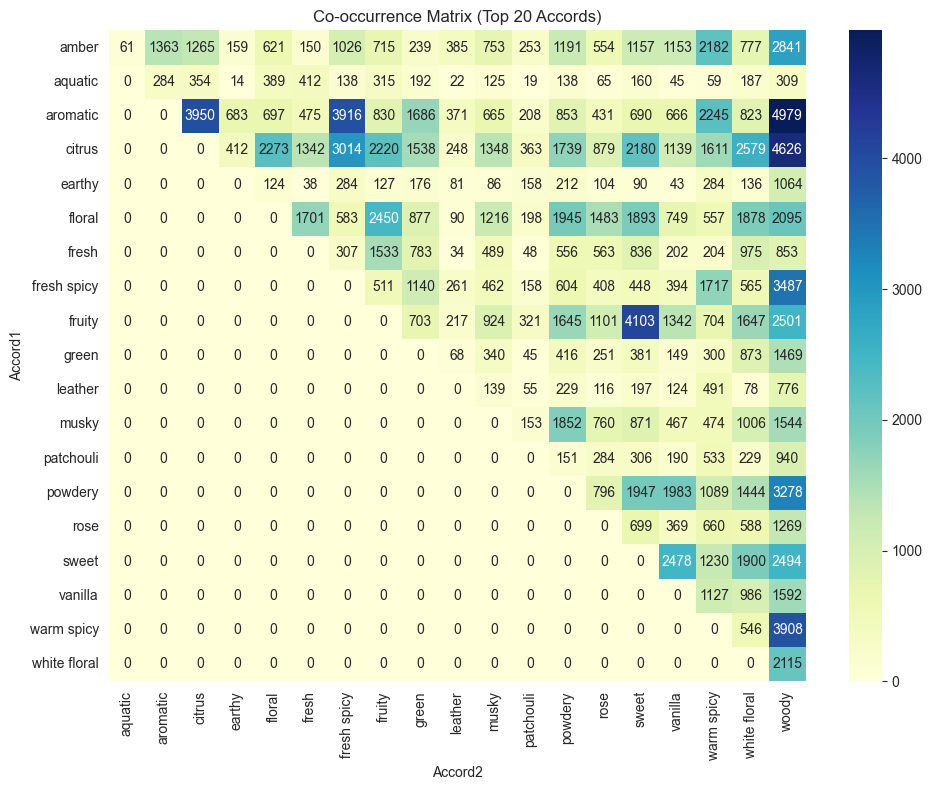

In [44]:
df['all_accords'] = df[['mainaccord1','mainaccord2','mainaccord3','mainaccord4','mainaccord5']].apply(lambda x: [v for v in x if pd.notna(v)],axis=1)

# Count co-occurrences
co_occurrence_accords = Counter()
for accords in df['all_accords']:
    unique_accords = set(accords)
    for a, b in combinations(sorted(unique_accords), 2):
        co_occurrence_accords[(a, b)] += 1

# Get top 20 notes overall
all_accords_flat = [accord for accords in df['all_accords'] for accord in accords]
top_accords = pd.Series(all_accords_flat).value_counts().head(20).index

# Build co-occurrence DataFrame for top notes
co_df_acc = pd.DataFrame(
    [(a, b, count) for (a, b), count in co_occurrence_accords.items() if a in top_accords and b in top_accords],
    columns=['Accord1', 'Accord2', 'Count']
)
co_matrix_acc = co_df_acc.pivot(index='Accord1', columns='Accord2', values='Count').fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(co_matrix_acc, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Co-occurrence Matrix (Top 20 Accords)')
plt.tight_layout()
plt.show()

The co-occurrence heatmap of the top 20 accords shows that certain accords dominate as the backbone of many perfumes. Aromatic is the most central accord, frequently paired with many others, especially with citrus (around 4,262 co-occurrences), woody (around 4,979), and fresh (around 3,485). Woody accords also play a major role in perfume construction, often appearing alongside citrus (around 4,662), floral (around 2,095), and powdery (around 3,278). Similarly, citrus is widely used in combination with aromatic, woody, and fresh accords, making it a key bridge across fragrance families.

Floral accords also show strong versatility, often appearing in both fresh and woody blends. In contrast, accords such as leather, musky, and patchouli occur far less frequently in combination with others, which suggests that they are typically used as niche or accent components rather than as structural bases. However, if we take into account that musk is the most popular note to be used this could also mean that it has a more supporting role as a note which may not portray it as a prominent accord.

Overall, the analysis highlights that modern perfumery is largely built on the interplay of aromatic, citrus, woody, and fresh accords, with these combinations forming the backbone of mainstream fragrances. Specialized accords tend to act as supporting notes layered onto these dominant families.

### Temporal Trends for Top 5 Accords

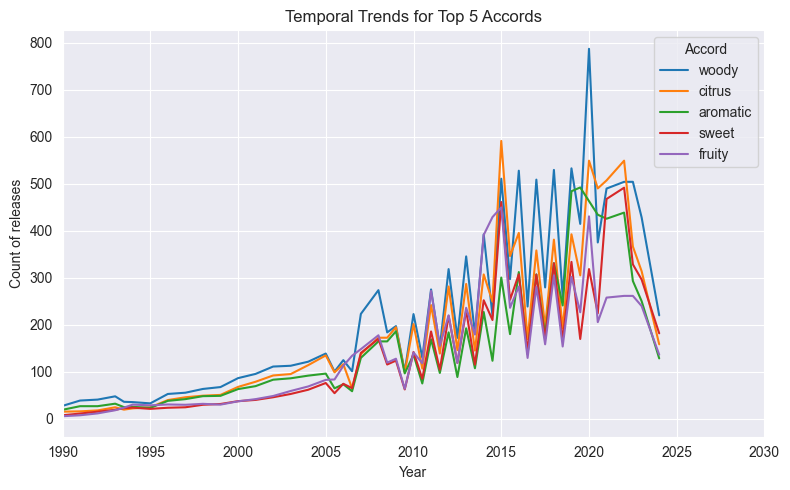

In [45]:
abs_trend_acc = {}
for accord in top_accords[:5]:
    has_accord = df.apply(lambda r: accord.lower() in r['all_accords'], axis=1)
    abs_trend_acc[accord]  = df[has_accord].groupby('Year').size()

abs_trend_df_acc = pd.DataFrame(abs_trend_acc).sort_index()
abs_trend_df_acc = abs_trend_df_acc.rolling(3,min_periods=1).mean()

ax = abs_trend_df_acc.plot(figsize=(8,5))
ax.set_title(f"Temporal Trends for Top 5 Accords")
ax.set_ylabel("Count of releases")
ax.set_xlabel("Year")
ax.set_xlim(1990,2030)
plt.legend(title="Accord")
plt.tight_layout()
plt.show()

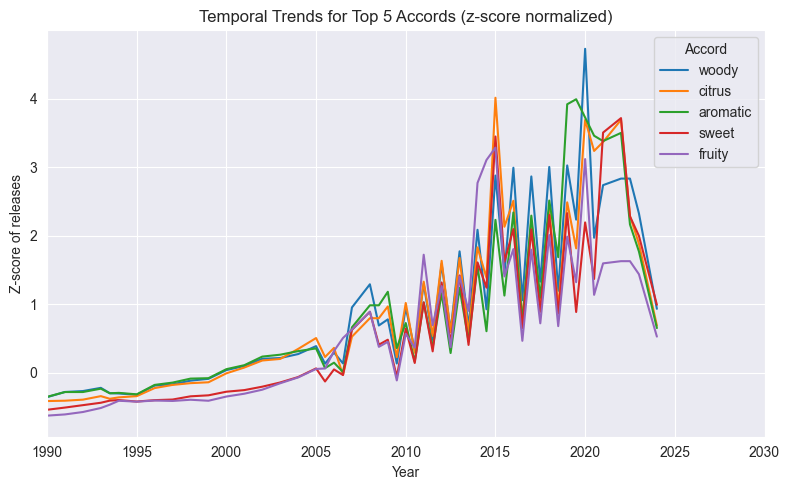

In [46]:
zscore_df_acc = abs_trend_df_acc.apply(
    lambda x: (x - x.mean()) / (x.std() if x.std() > 0 else 1),
    axis=0
)

ax = zscore_df_acc.plot(figsize=(8,5))
ax.set_title("Temporal Trends for Top 5 Accords (z-score normalized)")
ax.set_ylabel("Z-score of releases")
ax.set_xlabel("Year")
ax.set_xlim(1990, 2030)
plt.legend(title="Accord")
plt.tight_layout()
plt.show()

From 1990 through the early 2000s, all accords grew steadily in usage as the number of new perfume releases expanded. Around 2005, there was a marked acceleration, with all five accords increasing sharply in frequency. This reflects both a boom in perfume launches and a broad adoption of these popular olfactory families.

Between 2010 and 2020, woody, citrus, aromatic, sweet, and fruity accords all reached their peak popularity, with annual release counts often exceeding several hundred for each accord. Notably, woody and citrus accords consistently remained the most dominant, while sweet and fruity gained significant ground in the 2010s, reflecting shifts in consumer preference toward gourmand and playful scent profiles.

After 2020, the chart shows a decline across all accords, which likely reflects incomplete data for the most recent years rather than a true collapse in popularity.

Overall, the findings highlight that the modern perfume market has been shaped by a strong rise in woody, citrus, aromatic, sweet, and fruity accords, with a peak in the 2010s and a leveling off in the 2020s

### Top Accord Distribution over Gender

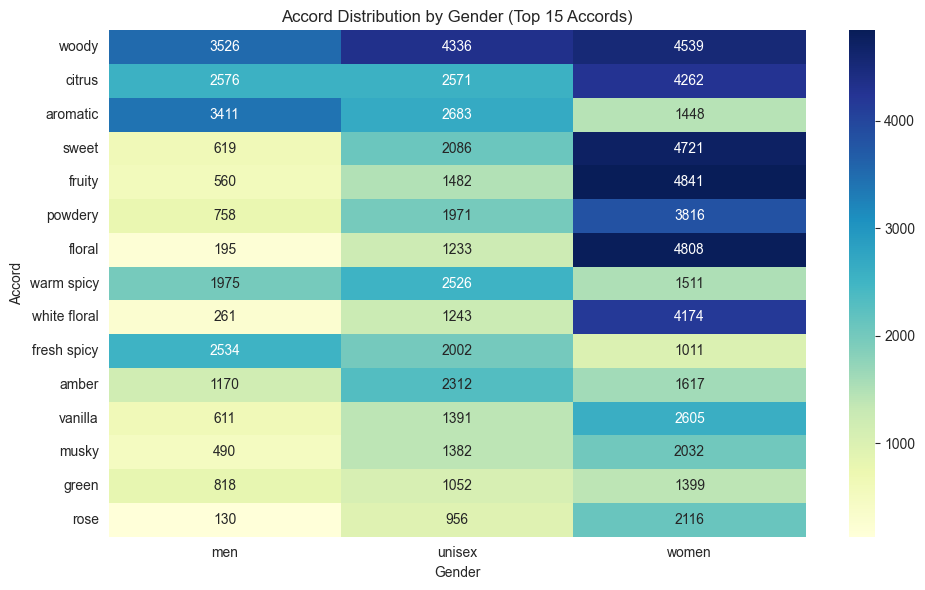

In [47]:
accord_cols = [c for c in df.columns if c.startswith('mainaccord')]

accord_long = df.melt(id_vars=['Gender'],value_vars=accord_cols,var_name='position',value_name='accord')
accord_long.dropna(subset=['accord'],inplace =True)

accord_gender_ct = pd.crosstab(accord_long['accord'],accord_long['Gender'])

top_accords = accord_gender_ct.sum(axis=1).sort_values(ascending=False).head(15).index
accord_gender_ct_top = accord_gender_ct.loc[top_accords]

plt.figure(figsize=(10,6))
sns.heatmap(accord_gender_ct_top,annot=True,fmt='d',cmap='YlGnBu')
plt.title('Accord Distribution by Gender (Top 15 Accords)')
plt.xlabel('Gender')
plt.ylabel('Accord')
plt.tight_layout()
plt.show()

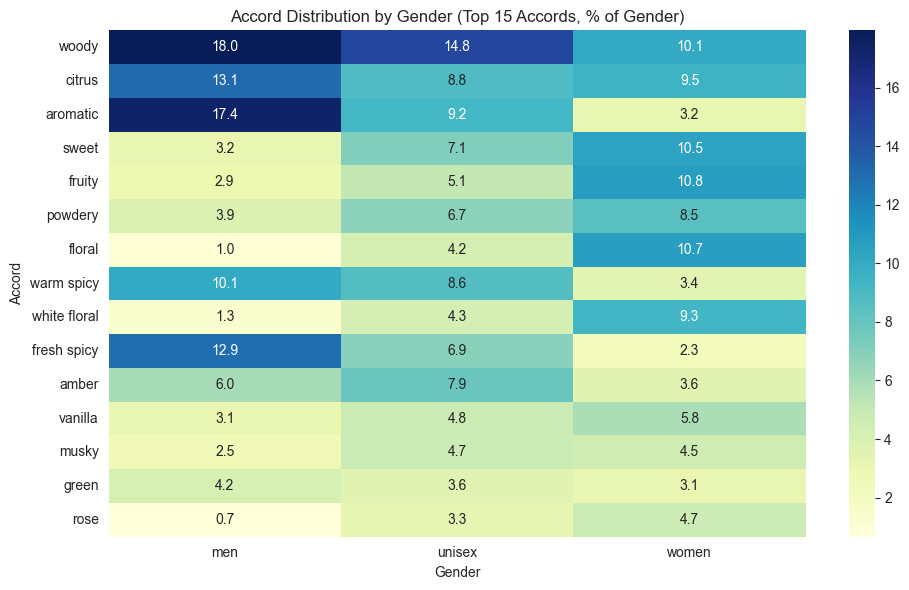

In [48]:
accord_gender_ct_prop = accord_gender_ct_top.div(accord_gender_ct_top.sum(axis=0), axis=1) * 100

plt.figure(figsize=(10,6))
sns.heatmap(accord_gender_ct_prop, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Accord Distribution by Gender (Top 15 Accords, % of Gender)')
plt.ylabel('Accord')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

Men’s fragrances are dominated by woody, aromatic, and spicy accords, while women’s perfumes lean toward sweet, fruity, and floral profiles. Unisex fragrances strike a balance, blending woody and aromatic foundations with softer accords such as powdery and fruity. This highlights clear gendered patterns in accord usage, but also shows unisex scents bridging both traditions.

### Probability of an Accord being Mainaccord1

/var/folders/jz/hkhgc4gx2dj_k8h_29_96nlw0000gn/T/ipykernel_61859/797132234.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_probs_pct.values, y=popular_probs_pct.index, palette="viridis")


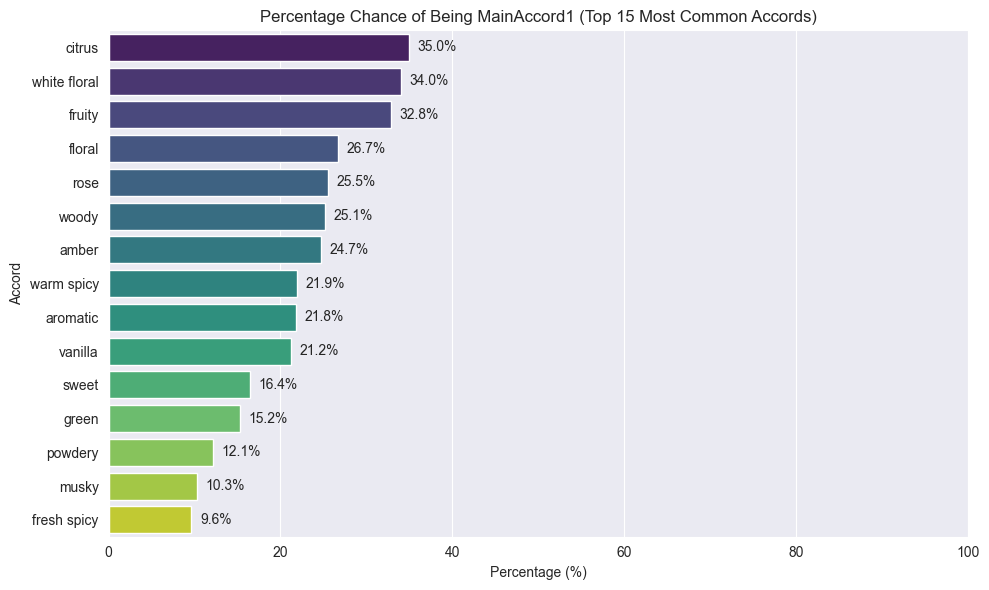

In [49]:
accord_long = df.melt(id_vars=['Perfume'],value_vars=accord_cols,var_name='position',value_name='accord')
accord_long.dropna(subset=['accord'],inplace=True)

accord_total = accord_long.groupby("accord").size().sort_values(ascending=False)
popular_accords = accord_total.head(15).index


accord_main1 = accord_long[accord_long["position"]=="mainaccord1"].groupby("accord").size()
accord_prob = (accord_main1 / accord_total).fillna(0)

popular_probs = accord_prob.loc[popular_accords].sort_values(ascending=False)
popular_probs_pct = (popular_probs * 100).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=popular_probs_pct.values, y=popular_probs_pct.index, palette="viridis")
plt.title("Percentage Chance of Being MainAccord1 (Top 15 Most Common Accords)")
plt.xlabel("Percentage (%)")
plt.ylabel("Accord")
plt.xlim(0,100)
for i, v in enumerate(popular_probs_pct.values):
    plt.text(v + 1, i, f"{v:.1f}%", va="center")
plt.tight_layout()
plt.show()

Among the most popular accords, citrus, white floral, and fruity are the most likely to define a fragrance, appearing as the main accord in over 30% of their uses. Floral, woody, and amber also frequently serve as backbones, though at slightly lower rates. In contrast, accords such as powdery, musky, and fresh spicy are more often used in supporting roles rather than as the primary identity of a perfume.

# Conclusion

### 1. Perfume Releases
- **Overall trend:** Number of perfume releases has grown steadily, especially from 1990 onwards, peaking around 2015–2020 before a slight decline.
- **By brand:** A few brands dominate release volumes like Avon and Zara, while many smaller houses contribute niche fragrances.
- **By country:** France, the USA, and Italy are leading sources of perfume launches.

### 2. Ratings
- **Distribution:** Ratings cluster around mid-to-high values, with relatively few very low-scoring perfumes.
- **Weighted ratings:** Adjusting for rating counts highlights niche but well-loved perfumes, avoiding bias toward mass-market bestsellers.
- **Correlation:** No Correlation between higher rating counts and lower ratings.

### 3. Notes
- **Frequency:** Musk, bergamot, and sandalwood are among the most common notes across perfumes.
- **Segmentation:** Notes differ by gender — women’s fragrances lean floral/fruity, men’s lean woody/spicy, unisex balance the two.
- **Co-occurrence:** Notes show strong pairing patterns (e.g., bergamot with patchouli, amber with musk).
- **Temporal trends:** Certain notes (e.g., musk, bergamot) surged in popularity after 2000, while classics (e.g., vanilla, sandalwood) remain stable.

### 4. Accords
- **Basic distribution:** Woody, aromatic, citrus, floral, and amber are the most common accords.
- **Co-occurrence:** Analysis highlights that modern perfumery is largely built on the interplay of aromatic, citrus, woody, and fresh accords, with these combinations forming the backbone of mainstream fragrances. Specialized accords tend to act as supporting notes layered onto these dominant families.
- **Temporal trends:** The modern perfume market has been shaped by a strong rise in woody, citrus, aromatic, sweet, and fruity accords, with a peak in the 2010s and a leveling off in the 2020s.
- **Gender differences:**
  - Men: woody, aromatic, spicy.
  - Women: floral, fruity, sweet, white floral.
  - Unisex: woody, aromatic, powdery, fruity.
- **Position importance:** Citrus, white floral, and fruity accords are most likely to appear as **main accord (1st position)**. Musky, powdery, and fresh spicy are more often supporting accords.
---